<a href="https://colab.research.google.com/github/pedro-pauletti/IBM-Attrition-Dataset-Analysis/blob/main/IBM_Attrition_Dataset_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Attrition

https://www.kaggle.com/datasets/yasserh/ibm-attrition-dataset

A IBM é uma multinacional americana que opera em cerca de 170 países com grandes verticais de negócios como computação, software e hardware.
O Attrition é um grande risco para as organizações prestadoras de serviços, onde pessoas treinadas e experientes são os ativos da empresa. A organização gostaria de identificar os fatores que influenciam o desgaste dos funcionários.
Attrition é um termo em inglês que significa a saída de funcionários da organização por qualquer motivo (voluntário ou involuntário), incluindo demissão, rescisão, falecimento ou aposentadoria.,



Data Dictionary

Age: Age of employee

Attrition: Employee attrition status

Department: Department of work

DistanceFromHome

Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;

EducationField

EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

MaritalStatus

MonthlyIncome

NumCompaniesWorked: Number of companies worked prior to IBM

WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;

YearsAtCompany: Current years of service in IBM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Seleção e pré-processamento de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

## 1.1 Dataset Visão Geral

In [ ]:
names = ['Age','Attrition','Department','DistanceFromHome','Education','EducationField',
            'EnvironmentSatisfaction','JobSatisfaction','MaritalStatus','MonthlyIncome',
            'NumCompaniesWorked','WorkLifeBalance','YearsAtCompany'] 

features = ['Age','Attrition','Department','DistanceFromHome','Education','EducationField',
            'EnvironmentSatisfaction','JobSatisfaction','MaritalStatus','MonthlyIncome',
            'NumCompaniesWorked','WorkLifeBalance','YearsAtCompany']


input_file = '/content/drive/MyDrive/9⁰ SEM/MDAE/Dataset/IBM.csv'

df = pd.read_csv(input_file,         # Nome do arquivo com dados      # Nome das colunas 
                    usecols = features, # Define as colunas que serão  utilizadas
                    na_values='NaN')      # Define que ? será considerado valores ausentes

df_original = df.copy()

print(df.describe())

               Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1470.000000    1470.000000         1470.000000      1470.000000   
mean          2.728571    6502.931293            2.693197         2.761224   
std           1.102846    4707.956783            2.498009      

In [ ]:
# Dataset lenght
len(df)

1470

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
df.head()

Age Attrition              Department  DistanceFromHome  Education  \
0   49        No  Research & Development                 8          1   
1   41       Yes                   Sales                 1          2   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        3                2       Married   
1  Life Sciences                        2                4        Single   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5130                   1                3              10  
1           5993                   8                1               6  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [ ]:
# Compute summary statistics
summary = df.describe()

summary

Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1470.000000    1470.000000         1470.000000      1470.000000   
mean          2.728571    6502.931293            2.693197         2.761224   
std           1.102846    4707.956783            2.498009         0.706476   
min           1.000000    1009.000000            0.000000         1.000000   
25%           2.000000    2911.000000            1.000000         2.000000   
50%           3.000000    4919.000000            2.000000         3.000000   
75%           4.000000    8379.000000            4.000000         3.000000   
max           4.000000   19999.000000            9.000000         4.000000   

       YearsAtCompany  
count     1470.000000  
mean         7.008163  
std          6.126525  
min          0.000000  
25%          3.000000  
50%          5.000000  
75%          9.000000  
max         40.000000

# 2. Normalização e redução de dados



## 2.1 Limpeza dos Dados 

In [ ]:
def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

In [ ]:
# Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
print(df.isnull().sum())
print("\n")    

columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'mode' # number or median or mean or mode

for c in columns_missing_value:
    UpdateMissingValues(df, c)

output_file = '/content/drive/MyDrive/9⁰ SEM/MDAE/Dataset/IBMClear.csv'
# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file, header=False, index=False)  

VALORES FALTANTES

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


Index([], dtype='object')


## 2.2 Tratamento de Atributos Categóricos

In [ ]:
df_numerical = df.copy()

# Select the categorical columns
categorical_columns = ['Attrition', 'Department', 'EducationField', 'MaritalStatus']

#convert all categorical columns to numeric
df_numerical[categorical_columns] = df_numerical[categorical_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
print("Original DataFrame")
print(df.head(15))
print("Only Numeric DataFrame")
print(df_numerical.head(15))

Original DataFrame
    Age Attrition              Department  DistanceFromHome  Education  \
0    49        No  Research & Development                 8          1   
1    41       Yes                   Sales                 1          2   
2    37       Yes  Research & Development                 2          2   
3    33        No  Research & Development                 3          4   
4    27        No  Research & Development                 2          1   
5    32        No  Research & Development                 2          2   
6    59        No  Research & Development                 3          3   
7    30        No  Research & Development                24          1   
8    38        No  Research & Development                23          3   
9    36        No  Research & Development                27          3   
10   35        No  Research & Development                16          3   
11   29        No  Research & Development                15          2   
12   31        No  

## 2.4 Normalização dos Dados

#### MinMax

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Select the columns that need to be normalized
columns_to_normalize = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns using the scaler
df_normalizedMinMax = pd.DataFrame(scaler.fit_transform(df_numerical[columns_to_normalize]), columns=columns_to_normalize)

# Concatenate the normalized columns with the remaining columns from the original dataframe
df_normalizedMinMax = pd.concat([df_numerical.drop(columns_to_normalize, axis=1), df_normalizedMinMax], axis=1)

print(df_normalizedMinMax)

      Attrition  Department  Education  EducationField  \
0             0           0          1               0   
1             1           1          2               0   
2             1           0          2               1   
3             0           0          4               0   
4             0           0          1               2   
...         ...         ...        ...             ...   
1465          0           0          2               2   
1466          0           0          1               2   
1467          0           0          3               0   
1468          0           1          3               2   
1469          0           0          3               2   

      EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  \
0                           3                2              0   
1                           2                4              1   
2                           4                3              1   
3                           4              

In [ ]:
print(df)

      Age Attrition              Department  DistanceFromHome  Education  \
0      49        No  Research & Development                 8          1   
1      41       Yes                   Sales                 1          2   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0     Li

#### Z-score

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df_normalizedZScore = pd.DataFrame(scaler.fit_transform(df_numerical[columns_to_normalize]), columns=columns_to_normalize)

# Concatenate the normalized columns with the remaining columns from the original dataframe
df_normalizedZScore = pd.concat([df_numerical.drop(columns_to_normalize, axis=1), df_normalizedZScore], axis=1)

print(df_normalizedZScore)


      Attrition  Department  Education  EducationField  \
0             0           0          1               0   
1             1           1          2               0   
2             1           0          2               1   
3             0           0          4               0   
4             0           0          1               2   
...         ...         ...        ...             ...   
1465          0           0          2               2   
1466          0           0          1               2   
1467          0           0          3               0   
1468          0           1          3               2   
1469          0           0          3               2   

      EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  \
0                           3                2              0   
1                           2                4              1   
2                           4                3              1   
3                           4              

## 2.3 Removendo Outliers

In [ ]:
#Removal of outlier:

df_removed = df_normalizedMinMax.copy()

for i in [i for i in df_removed.columns]:
    if df_removed[i].nunique()>=12:
        Q1 = df_removed[i].quantile(0.25)
        Q3 = df_removed[i].quantile(0.75)
        IQR = Q3 - Q1
        df_removed = df_removed[df_removed[i] <= (Q3+(1.5*IQR))]
        df_removed = df_removed[df_removed[i] >= (Q1-(1.5*IQR))]
df_removed = df_removed.reset_index(drop=True)
display(df_removed.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df_normalizedMinMax.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df_removed.shape[0]))


Attrition  Department  Education  EducationField  EnvironmentSatisfaction  \
0          0           0          1               0                        3   
1          1           1          2               0                        2   
2          1           0          2               1                        4   
3          0           0          4               0                        4   
4          0           0          1               2                        1   

   JobSatisfaction  MaritalStatus  WorkLifeBalance       Age  \
0                2              0                3  0.738095   
1                4              1                1  0.547619   
2                3              1                3  0.452381   
3                3              0                3  0.357143   
4                2              0                3  0.214286   

   DistanceFromHome  MonthlyIncome  NumCompaniesWorked  YearsAtCompany  
0          0.250000       0.217009            0.111111            0.25  
1          0.000000       0.262454            0.888889            0.15  
2          0.035714       0.056925            0.666667            0.00  
3          0.071429       0.100053            0.111111            0.20  
4          0.035714       0.129489            1.000000            0.05


Inference: Before removal of outliers, The dataset had 1470 samples.
Inference: After removal of outliers, The dataset now has 1293 samples.


## 2.6 Balanceamento do Dataset

Original class distribution:
0    1068
1     225
Name: Attrition, dtype: int64

Class distribution after applying SMOTE Technique:
0    1068
1    1068
Name: Attrition, dtype: int64


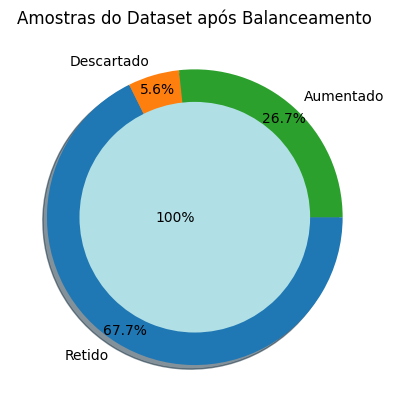


Inference:The final dataset after cleanup has 1470 samples & 13 columns.


In [ ]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE

df_balanced = df_removed.copy()

print('Original class distribution:')
print(df_balanced['Attrition'].value_counts())

xf = df_balanced.columns
X = df_balanced.drop(['Attrition'],axis=1)
Y = df_balanced['Attrition']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df_balanced = pd.DataFrame(X, columns=xf)
df_balanced['Attrition'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

df_final= df_balanced.copy()
plt.title('Amostras do Dataset após Balanceamento')
plt.pie([df_final.shape[0], df_normalizedMinMax.shape[0]-df_removed.shape[0], df_balanced.shape[0]-df_removed.shape[0]], radius = 1, shadow=True,
        labels=['Retido','Descartado','Aumentado'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df_final.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

## 2.5 PCA

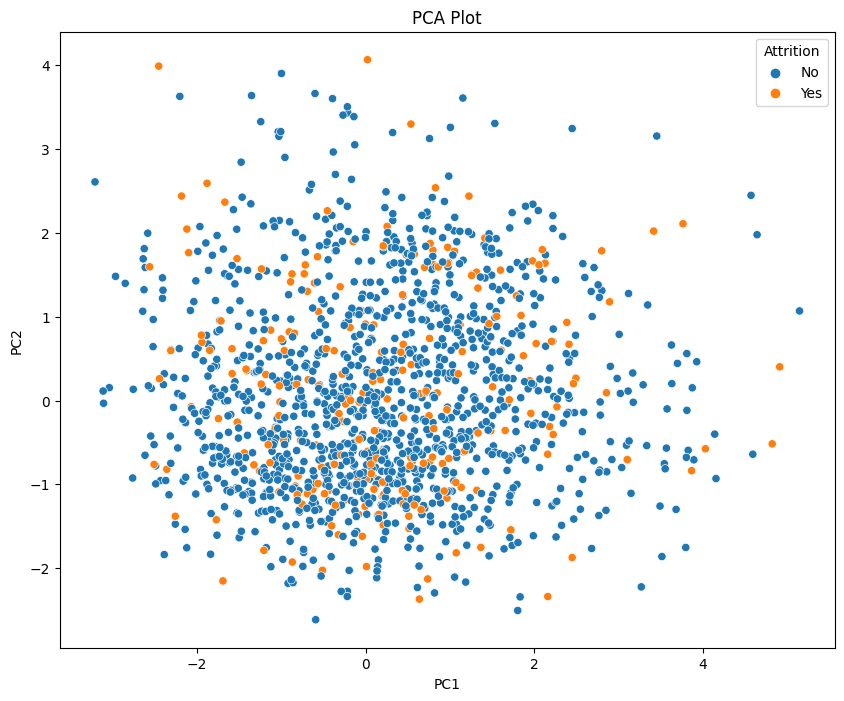

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and the target variable (Attrition)
X = df_balanced.drop("Attrition", axis=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # You can change the number of components as per your requirement

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)


# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target variable (Attrition) back to the DataFrame
pca_df['Attrition'] = df['Attrition']

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Attrition', data=pca_df)
plt.title('PCA Plot')
plt.show()


In [ ]:
# 3D PCA projection

pca = PCA(n_components=3)
components = pca.fit_transform(x)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Attrition'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

NameError: ignored

# 3. Análise descritiva de dados - Visualização

## 3.1 Distribuição de Frequência

### Visualização Indivual de cada Coluna

#### Idade

In [ ]:
min = df['Age'].min()
max = df['Age'].max()


bins = [min, 21, 35, 50, max]

labels=['<=21', '22-35', '36-50', '51-60']

group = pd.cut(df['Age'], labels=labels, bins=bins, include_lowest=True)


countGroup = group.value_counts(sort=False)

In [ ]:
#-------------------------- Absolute Frequency------------------------------------
fig = px.bar(countGroup, title="Age of employees", text_auto=True, labels=labels)
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Absolute Frequency",
    title_x = 0.5,
    showlegend = False
)

fig.show()

In [ ]:
#-------------------------- Relative Frequency------------------------------------

for i in range(len(countGroup)):
    countGroup[i] = (countGroup[i] / len(df['Age']))*100

fig = px.bar(countGroup, title="Age of employees", text_auto=True, labels=labels)
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Relative Frequency",
    title_x = 0.5,
    showlegend = False
)

fig.show()

#### Job Satisfaction

In [ ]:
# Calculate the frequency of each category
frequency = df['JobSatisfaction'].value_counts().sort_index()

categories = ['1-Low', '2-Medium', '3-High', '4-Very High']

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'Job Satisfaction', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Job Satisfaction Frequency Distribution', xaxis_title='Job Satisfaction', yaxis_title='Frequency')

# Display the graph
fig.show()

#### MonthlyIncome

In [ ]:
# Define the range intervals for the distribution
range_intervals = [0, 3000, 5000, 7000, 10000, float('inf')]
range_labels = ['<3000', '3000-5000', '5000-7000', '7000-10000', '>10000']

# Create a new column to store the range category for each MonthlyIncome value
df_incomeRange = pd.cut(df['MonthlyIncome'], bins=range_intervals, labels=range_labels)

# Calculate the frequency of each income range
frequency = df_incomeRange.value_counts().sort_index()

# Plot the frequency distribution graph using Plotly
fig = px.bar(x=frequency.index, y=frequency.values)

# Customize the plot layout
fig.update_layout(
    title='Monthly Income Distribution',
    xaxis_title='Income Range',
    yaxis_title='Frequency'
)

# Show the plot
fig.show()

#### Department

In [ ]:
# Calculate the frequency of each category
frequency = df['Department'].value_counts().sort_index()

categories = df['Department'].unique()

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'Department', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Department Frequency Distribution', xaxis_title='Department', yaxis_title='Frequency')

# Display the graph
fig.show()

#### DistanceFromHome

In [ ]:
# Define the range intervals for the distribution
range_intervals = [1, 5, 10, 20, 25, float('inf')]
range_labels = ['<5', '5-10', '10-20', '20-25', '>25']

# Create a new column to store the range category for each MonthlyIncome value
df_distanceRange = pd.cut(df['DistanceFromHome'], bins=range_intervals, labels=range_labels)

# Calculate the frequency of each income range
frequency = df_distanceRange.value_counts().sort_index()

# Plot the frequency distribution graph using Plotly
fig = px.bar(x=frequency.index, y=frequency.values)

# Customize the plot layout
fig.update_layout(
    title='Distance From Home Distribution',
    xaxis_title='Distance',
    yaxis_title='Frequency'
)

# Show the plot
fig.show()

#### Education

In [ ]:
# Calculate the frequency of each category
frequency = df['Education'].value_counts().sort_index()


categories = ['1-Below College', '2- College', '3-Bachelor', '4-Master', '5-Doctor']

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'Education', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Education Frequency Distribution', xaxis_title='Education', yaxis_title='Frequency')

# Display the graph
fig.show()

#### EducationField

In [ ]:
# Calculate the frequency of each category
frequency = df['EducationField'].value_counts().sort_index()

categories = df['EducationField'].unique()

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'EducationField', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Education Field Frequency Distribution', xaxis_title='Education Field', yaxis_title='Frequency')

# Display the graph
fig.show()

#### EnvironmentSatisfaction

In [ ]:
# Calculate the frequency of each category
frequency = df['EnvironmentSatisfaction'].value_counts().sort_index()

categories = ['1-Low', '2-Medium', '3-High', '4-Very High']

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'Environment Satisfaction', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='EnvironmentSatisfaction Frequency Distribution', xaxis_title='Environment Satisfaction', yaxis_title='Frequency')

# Display the graph
fig.show()

#### MaritalStatus

In [ ]:
# Calculate the frequency of each category
frequency = df['MaritalStatus'].value_counts().sort_index()

categories = df['MaritalStatus'].unique()

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'MaritalStatus', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Marital Status Frequency Distribution', xaxis_title='MaritalStatus', yaxis_title='Frequency')

# Display the graph
fig.show()

#### NumCompaniesWorked

In [ ]:
# Calculate the frequency of each category
frequency = df['NumCompaniesWorked'].value_counts().sort_index()

categories = df['NumCompaniesWorked'].unique()

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'NumCompaniesWorked', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Num Companies Worked Frequency Distribution', xaxis_title='Num Companies Worked ', yaxis_title='Frequency')

# Display the graph
fig.show()

#### WorkLifeBalance

In [ ]:
# Calculate the frequency of each category
frequency = df['WorkLifeBalance'].value_counts().sort_index()


categories = ['1-Bad', '2-Good', '3-Better', '4-Best']

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'WorkLifeBalance', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Work Life Balance Frequency Distribution', xaxis_title='Work Life Balance', yaxis_title='Frequency')

# Display the graph
fig.show()

#### YearsAtCompany

In [ ]:
# Calculate the frequency of each category
frequency = df['YearsAtCompany'].value_counts().sort_index()

categories = df['YearsAtCompany'].unique()

# Create the frequency distribution graph using Plotly
fig = px.bar(x=categories, y=frequency, labels={'x': 'YearsAtCompany', 'y': 'Frequency'})

# Set the title and axes labels
fig.update_layout(title='Years At Company Frequency Distribution', xaxis_title='Years At Company', yaxis_title='Frequency')

# Display the graph
fig.show()

### Visualização Geral das Colunas

#### Colunas Categóricas

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 3 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('Marital Status', 'Department', 'EducationField', 'Environment Satisfaction', 'Job Satisfaction', 'Work Life Balance'))

# Get unique labels for each categorical feature
marital_status_labels = df['MaritalStatus'].unique()
department_labels = df['Department'].unique()
education_field_labels = df['EducationField'].unique()
environment_satisfaction_labels = df['EnvironmentSatisfaction'].unique()
job_satisfaction_labels = df['JobSatisfaction'].unique()
work_life_balance_labels = df['WorkLifeBalance'].unique()

# Calculate the frequency of each category for each categorical feature
marital_status_freq = df['MaritalStatus'].value_counts().sort_index()
department_freq = df['Department'].value_counts().sort_index()
education_field_freq = df['EducationField'].value_counts().sort_index()
environment_satisfaction_freq = df['EnvironmentSatisfaction'].value_counts().sort_index()
job_satisfaction_freq = df['JobSatisfaction'].value_counts().sort_index()
work_life_balance_freq = df['WorkLifeBalance'].value_counts().sort_index()

# Add bar charts to the subplots
fig.add_trace(go.Bar(x=marital_status_labels, y=marital_status_freq, name='Marital Status'), row=1, col=1)
fig.add_trace(go.Bar(x=department_labels, y=department_freq, name='Department'), row=1, col=2)
fig.add_trace(go.Bar(x=education_field_labels, y=education_field_freq, name='Education Field'), row=2, col=1)
fig.add_trace(go.Bar(x=environment_satisfaction_labels, y=environment_satisfaction_freq, name='Environment Satisfaction'), row=2, col=2)
fig.add_trace(go.Bar(x=job_satisfaction_labels, y=job_satisfaction_freq, name='Job Satisfaction'), row=3, col=1)
fig.add_trace(go.Bar(x=work_life_balance_labels, y=work_life_balance_freq, name='Work Life Balance'), row=3, col=2)

# Update layout and axis labels
fig.update_layout(height=1000, width=1400, showlegend=False)
fig.update_xaxes(title_text='Categories', row=1, col=1)
fig.update_xaxes(title_text='Categories', row=1, col=2)
fig.update_xaxes(title_text='Categories', row=2, col=1)
fig.update_xaxes(title_text='Categories', row=2, col=2)
fig.update_xaxes(title_text='Categories', row=3, col=1)
fig.update_xaxes(title_text='Categories', row=3, col=2)
fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=3, col=1)
fig.update_yaxes(title_text='Frequency', row=3, col=2)

# Show the figure
fig.show()



#### Colunas Numéricas

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=('Age', 'Distance From Home', 'Monthly Income', 'Years at Company'))

# Add histogram charts to the subplots
fig.add_trace(go.Histogram(x=df['Age'], nbinsx=20, name='Age'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['DistanceFromHome'], nbinsx=20, name='Distance From Home'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['MonthlyIncome'], nbinsx=20, name='Monthly Income'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['YearsAtCompany'], nbinsx=20, name='Years at Company'), row=2, col=2)

# Add curve (kernel density estimate) to each subplot
fig.add_trace(go.Histogram(x=df['Age'], nbinsx=20, name='Age', histnorm='probability density'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['DistanceFromHome'], nbinsx=20, name='Distance From Home', histnorm='probability density'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['MonthlyIncome'], nbinsx=20, name='Monthly Income', histnorm='probability density'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['YearsAtCompany'], nbinsx=20, name='Years at Company', histnorm='probability density'), row=2, col=2)

# Update layout and axis labels
fig.update_layout(height=800, width=800, showlegend=False)
fig.update_xaxes(title_text='Value', row=1, col=1)
fig.update_xaxes(title_text='Value', row=1, col=2)
fig.update_xaxes(title_text='Value', row=2, col=1)
fig.update_xaxes(title_text='Value', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=2)

# Show the figure
fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('Age', 'Distance From Home', 'Monthly Income', 'Years at Company', 'NumCompaniesWorked'))

# Add histogram charts to the subplots
fig.add_trace(go.Histogram(x=df['Age'], nbinsx=20, name='Age'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['DistanceFromHome'], nbinsx=20, name='Distance From Home'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['MonthlyIncome'], nbinsx=20, name='Monthly Income'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['YearsAtCompany'], nbinsx=20, name='Years at Company'), row=2, col=2)
fig.add_trace(go.Histogram(x=df['NumCompaniesWorked'], nbinsx=20, name='NumCompaniesWorked'), row=3, col=1)

# Add curve (kernel density estimate) to each subplot
fig.add_trace(go.Histogram(x=df['Age'], nbinsx=20, name='Age', histnorm='probability density'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['DistanceFromHome'], nbinsx=20, name='Distance From Home', histnorm='probability density'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['MonthlyIncome'], nbinsx=20, name='Monthly Income', histnorm='probability density'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['YearsAtCompany'], nbinsx=20, name='Years at Company', histnorm='probability density'), row=2, col=2)
fig.add_trace(go.Histogram(x=df['NumCompaniesWorked'], nbinsx=20, name='NumCompaniesWorked', histnorm='probability density'), row=3, col=1)

# Update layout and axis labels
fig.update_layout(height=800, width=800, showlegend=False)
fig.update_xaxes(title_text='Value', row=1, col=1)
fig.update_xaxes(title_text='Value', row=1, col=2)
fig.update_xaxes(title_text='Value', row=2, col=1)
fig.update_xaxes(title_text='Value', row=2, col=2)
fig.update_xaxes(title_text='Value', row=3, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=3, col=1)

# Show the figure
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=('Age', 'Distance From Home', 'Monthly Income', 'Years at Company'))

# Add boxplot charts to the subplots
fig.add_trace(go.Box(y=df['Age'], name='Age'), row=1, col=1)
fig.add_trace(go.Box(y=df['DistanceFromHome'], name='Distance From Home'), row=1, col=2)
fig.add_trace(go.Box(y=df['MonthlyIncome'], name='Monthly Income'), row=2, col=1)
fig.add_trace(go.Box(y=df['YearsAtCompany'], name='Years at Company'), row=2, col=2)

# Update layout and axis labels
fig.update_layout(height=800, width=800, showlegend=False)
fig.update_yaxes(title_text='Value', row=1, col=1)
fig.update_yaxes(title_text='Value', row=1, col=2)
fig.update_yaxes(title_text='Value', row=2, col=1)
fig.update_yaxes(title_text='Value', row=2, col=2)

# Show the figure
fig.show()


## 3.2 Gráfico de Setores

#### Attrition

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Calculate the value counts of Attrition
attrition_counts = df['Attrition'].value_counts()

# Create the Pie chart
fig = go.Figure(data=[go.Pie(labels=attrition_counts.index, values=attrition_counts.values)])

# Customize the chart
fig.update_layout(title='Attrition Status', height=800, width=800, showlegend=True)

# Display the chart
fig.show()

## 3.3 Gráfico de Dispersão

#### Age vs. MonthlyIncome

Understanding the relationship between the age of employees and their monthly income can provide insights into potential salary growth and earning potential throughout an employee's career. This scatter plot can help answer questions such as: Do older employees tend to have higher incomes? Is there a peak earning age? Are there any outliers or patterns that suggest salary discrepancies based on age? This information can be valuable in identifying factors that may influence attrition, such as dissatisfaction with salary or limited growth opportunities.

In [ ]:
counts = df.groupby(['Age', 'MonthlyIncome']).size().reset_index(name='Count')

fig = px.scatter(counts, x='Age', y='MonthlyIncome', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Age vs. Monthly Income', xaxis_title='Age', yaxis_title='Monthly Income')

# Show the plot
fig.show()


#### DistanceFromHome vs. YearsAtCompany

Exploring the correlation between the distance employees live from work and the number of years they have been with the company can reveal insights into employee loyalty and job stability. This scatter plot can help answer questions such as: Do employees who live closer to work tend to stay with the company longer? Is there a relationship between commuting distance and turnover rates? Are there any notable clusters or trends that suggest a link between distance and job satisfaction? Understanding these dynamics can inform decisions regarding remote work policies, commuting assistance, or employee relocation programs to mitigate attrition risks.

In [ ]:
counts = df.groupby(['DistanceFromHome', 'YearsAtCompany']).size().reset_index(name='Count')

fig = px.scatter(counts, x='DistanceFromHome', y='YearsAtCompany', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Distance From Home vs. Years At Company', xaxis_title='Distance From Home', yaxis_title='Years At Company')

# Show the plot
fig.show()


#### NumCompaniesWorked vs. JobSatisfaction

Analyzing the relationship between the number of companies an employee has worked for before joining IBM and their job satisfaction level can provide insights into the impact of prior work experiences on employee satisfaction and attrition. This scatter plot can help answer questions such as: Do employees with more diverse work experiences tend to have higher or lower job satisfaction? Are there any commonalities or differences in satisfaction levels based on the number of companies worked? Are there specific thresholds or patterns that suggest a relationship between job satisfaction and attrition? Understanding these connections can guide talent acquisition strategies, training programs, or employee engagement initiatives to address potential attrition risks.

In [ ]:
counts = df.groupby(['NumCompaniesWorked', 'JobSatisfaction']).size().reset_index(name='Count')

fig = px.scatter(counts, x='NumCompaniesWorked', y='JobSatisfaction', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Num Companies Worked vs. Job Satisfaction', xaxis_title='Num Companies Worked', yaxis_title='Job Satisfaction')

# Show the plot
fig.show()


#### JobSatisfaction vs. EnvironmentSatisfaction: 

Job satisfaction and environment satisfaction are both important factors that can influence employee attrition. If employees are satisfied with their job and the work environment, they are more likely to stay with the company. By plotting these two variables on a scatter plot, you can observe if there is a positive correlation between job satisfaction and environment satisfaction. This can help the organization understand the impact of the work environment on job satisfaction and identify areas for improvement to reduce attrition.

In [ ]:
counts = df.groupby(['JobSatisfaction', 'EnvironmentSatisfaction']).size().reset_index(name='Count')

fig = px.scatter(counts, x='JobSatisfaction', y='EnvironmentSatisfaction', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='JobSatisfaction vs. Environment Satisfaction', xaxis_title='JobSatisfaction', yaxis_title='Environment Satisfaction')

# Show the plot
fig.show()

#### Education vs. MonthlyIncome

Education level often plays a significant role in an employee's earning potential. By plotting education level against monthly income, you can examine if higher education levels correspond to higher salaries. This scatter plot can provide insights into the correlation between education and income, helping the organization understand if employees with higher education levels are more likely to stay due to better financial prospects or if income levels play a role in attrition.

In [ ]:
range_intervals = [0, 2000, 5000, 10000, 20000, float('inf')]
range_labels = ['<2000', '2000-5000', '5000-10000', '10000-20000', '>20000']

df['IncomeInterval'] = pd.cut(df['MonthlyIncome'], bins=range_intervals, labels=range_labels)

counts = df.groupby(['Education', 'IncomeInterval']).size().reset_index(name='Count')

fig = px.scatter(counts, x='Education', y='IncomeInterval', size='Count', size_max=30)

fig.update_layout(title='Education vs. Monthly Income', xaxis_title='Education', yaxis_title='Monthly Income')

fig.show()

#### WorkLifeBalance vs. JobSatisfaction

Work-life balance and job satisfaction are closely related factors that can impact an employee's decision to stay or leave a company. By plotting work-life balance against job satisfaction, you can assess if employees with better work-life balance tend to have higher job satisfaction levels. This information can guide the organization in understanding the importance of work-life balance initiatives and how they can contribute to reducing attrition rates.

In [ ]:
counts = df.groupby(['WorkLifeBalance', 'JobSatisfaction']).size().reset_index(name='Count')

fig = px.scatter(counts, x='WorkLifeBalance', y='JobSatisfaction', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Work Life Balance vs. Job Satisfaction', xaxis_title='Work Life Balance', yaxis_title='Job Satisfaction')

# Show the plot
fig.show()

#### Age vs. NumCompaniesWorked


The number of companies an employee has worked for before joining IBM can indicate their career stability and potential job-hopping behavior. By plotting age against the number of companies worked, you can identify any trends or patterns related to age and the likelihood of employees having worked at multiple companies. This scatter plot can provide insights into the impact of prior work experiences on attrition, as employees with a higher number of companies worked might have a higher propensity for attrition.

In [ ]:
range_intervals = [18, 20, 25, 40, 50, float('inf')]
range_labels = ['<20', '20-25', '25-40', '40-50', '>50']

df['AgeInterval'] = pd.cut(df['Age'], bins=range_intervals, labels=range_labels)

counts = df.groupby(['AgeInterval', 'NumCompaniesWorked']).size().reset_index(name='Count')

fig = px.scatter(counts, x='AgeInterval', y='NumCompaniesWorked', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Age vs. Num Companies Worked', xaxis_title='Age', yaxis_title='Num Companies Worked')

# Show the plot
fig.show()

#### YearsAtCompany vs. Attrition

This scatter plot allows you to visualize the relationship between an employee's tenure (years at the company) and their attrition status. Employees who have been with the company for a longer duration might be more likely to be loyal and have lower attrition rates. By examining this relationship, you can identify any patterns or trends. It can help the organization understand if employees with longer tenures are less likely to leave, or if there is a point in an employee's tenure where attrition rates tend to increase, indicating potential risks and areas for improvement.

In [ ]:
counts = df.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='Count')

fig = px.scatter(counts, x='YearsAtCompany', y='Attrition', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Years At Company vs. Attrition', xaxis_title='Years At Company', yaxis_title='Attrition')

# Show the plot
fig.show()

#### Age vs. Attrition

Age can be an important factor in employee attrition. Plotting age against attrition can help identify if there is a relationship between age and the likelihood of employees leaving the company. It can provide insights into potential age-related attrition patterns or trends, such as early retirement or younger employees seeking new opportunities.



In [ ]:
range_intervals = [18, 20, 25, 40, 50, float('inf')]
range_labels = ['<20', '20-25', '25-40', '40-50', '>50']

df['AgeInterval'] = pd.cut(df['Age'], bins=range_intervals, labels=range_labels)

counts = df.groupby(['AgeInterval', 'Attrition']).size().reset_index(name='Count')

fig = px.scatter(counts, x='AgeInterval', y='Attrition', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Age vs. Attrition', xaxis_title='Age', yaxis_title='Attrition')

# Show the plot
fig.show()

#### MonthlyIncome vs. Attrition

Monthly income is often a significant factor influencing employee attrition. By plotting monthly income against attrition, you can examine if there is a correlation between income levels and the likelihood of employees leaving the company. It can help identify whether employees with lower or higher incomes are more prone to attrition and provide insights into potential salary-related attrition risks.



In [ ]:
range_intervals = [0, 2000, 5000, 10000, 20000, float('inf')]
range_labels = ['<2000', '2000-5000', '5000-10000', '10000-20000', '>20000']

df['IncomeInterval'] = pd.cut(df['MonthlyIncome'], bins=range_intervals, labels=range_labels)

counts = df.groupby(['IncomeInterval', 'Attrition']).size().reset_index(name='Count')

fig = px.scatter(counts, x='IncomeInterval', y='Attrition', size='Count', size_max=30)

fig.update_layout(title='Monthly Income vs. Attrition', xaxis_title='Monthly Income', yaxis_title='Attrition')

fig.show()

#### JobSatisfaction vs. Attrition

Job satisfaction is a critical factor that can impact employee attrition. Plotting job satisfaction against attrition can help identify if there is a relationship between the two. It can reveal whether employees with lower job satisfaction are more likely to leave the company, highlighting the importance of job satisfaction in reducing attrition rates.

In [ ]:
counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

fig = px.scatter(counts, x='JobSatisfaction', y='Attrition', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Job Satisfaction vs. Attrition', xaxis_title='Job Satisfaction', yaxis_title='Attrition')

# Show the plot
fig.show()

#### WorkLifeBalance vs. Attrition

Work-life balance is another crucial factor that can influence employee attrition. Plotting work-life balance against attrition can help determine if there is a correlation between the two. It can provide insights into whether employees with poor work-life balance are more likely to leave the company, emphasizing the significance of work-life balance initiatives in reducing attrition.

In [ ]:
counts = df.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Count')

fig = px.scatter(counts, x='WorkLifeBalance', y='Attrition', size='Count', size_max=30)

# Update the plot layout if desired
fig.update_layout(title='Work Life Balance vs. Attrition', xaxis_title='Work Life Balance', yaxis_title='Attrition')

# Show the plot
fig.show()

## 3.4 Matriz de Correlação

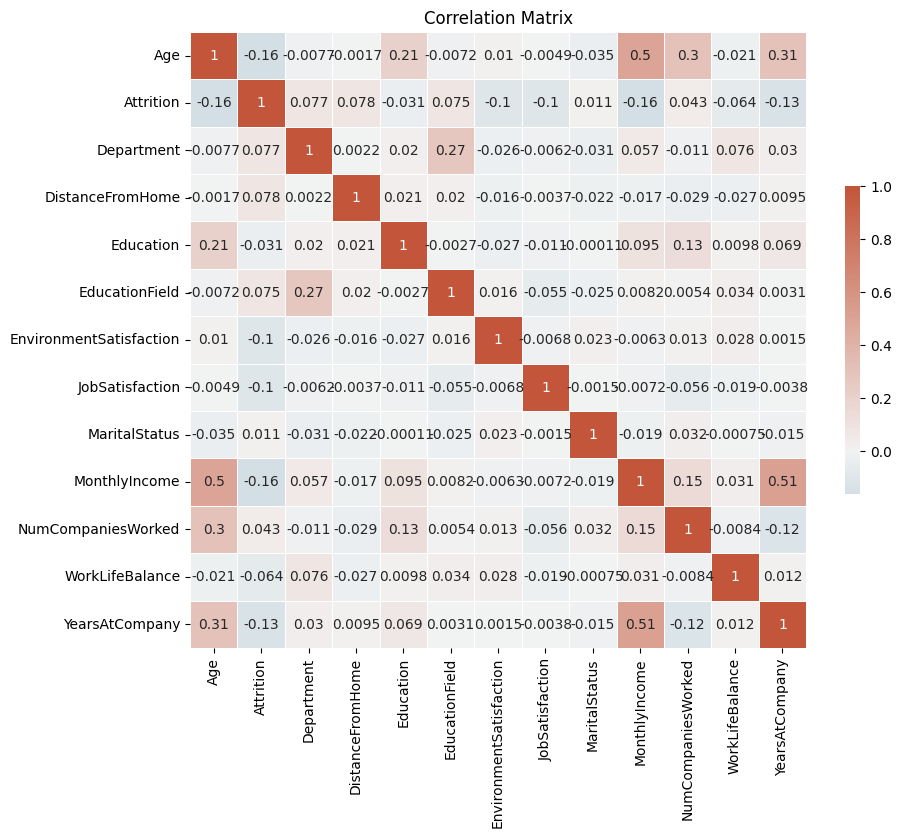

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the colorbar
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# 4. Análise descritiva de dados - Medidas

## 4.1 Medidas de Tedência Central

#### Média, Moda e Mediana

In [ ]:
import pandas as pd
import plotly.graph_objects as go


measures = {
    'Feature': [],
    'Mean': [],
    'Mode': [],
    'Median': []
}

for column in df_numerical.columns:
    if df_numerical[column].dtype in [int, float]:
        measures['Feature'].append(column)
        measures['Mean'].append(df_numerical[column].mean())
        measures['Mode'].append(df_numerical[column].mode().values[0])
        measures['Median'].append(df_numerical[column].median())


fig = go.Figure(data=[go.Table(
    header=dict(values=list(measures.keys()), fill_color='lightblue', align='left'),
    cells=dict(values=list(measures.values()))
)])

fig.show()


In [ ]:
import pandas as pd
from tabulate import tabulate


# Create an empty list to store the results
summary_table = []

# Iterate over each column in the DataFrame and calculate the measures
for column in df.columns:
    mean = df_numerical[column].mean()
    mode = df_numerical[column].mode().values[0]
    median = df_numerical[column].median()
    
    # Add the results to the summary table
    summary_table.append([column, mean, mode, median])

# Define the column names for the table
headers = ["Feature", "Mean", "Mode", "Median"]

# Convert the summary table to a LaTeX-formatted table
latex_table = tabulate(summary_table, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrrr}
\hline
 Feature                 &        Mean &   Mode &   Median \\
\hline
 Age                     &   36.9238   &     35 &       36 \\
 Attrition               &    0.161224 &      0 &        0 \\
 Department              &    0.389116 &      0 &        0 \\
 DistanceFromHome        &    9.19252  &      2 &        7 \\
 Education               &    2.91293  &      3 &        3 \\
 EducationField          &    1.46259  &      0 &        2 \\
 EnvironmentSatisfaction &    2.72177  &      3 &        3 \\
 JobSatisfaction         &    2.72857  &      4 &        3 \\
 MaritalStatus           &    0.764626 &      0 &        1 \\
 MonthlyIncome           & 6502.93     &   2342 &     4919 \\
 NumCompaniesWorked      &    2.6932   &      1 &        2 \\
 WorkLifeBalance         &    2.76122  &      3 &        3 \\
 YearsAtCompany          &    7.00816  &      5 &        5 \\
\hline
\end{tabular}


## 4.2 Medidas de Dispersão

#### Amplitude e Desvio Padrão

In [ ]:
import pandas as pd
import plotly.graph_objects as go


measures = {
    'Feature': [],
    'Range': [],
    'Standard Deviation': [],
}


for column in df_numerical.columns:
    if df_numerical[column].dtype in [int, float]:
        measures['Feature'].append(column)
        measures['Range'].append(df_numerical[column].max() - df_numerical[column].min())
        measures['Standard Deviation'].append(df_numerical[column].std())


fig = go.Figure(data=[go.Table(
    header=dict(values=list(measures.keys()), fill_color='lightblue', align='left'),
    cells=dict(values=list(measures.values()))
)])

# Display the figure
fig.show()

In [ ]:
import pandas as pd
from tabulate import tabulate


# Create an empty list to store the results
summary_table = []

# Iterate over each column in the DataFrame and calculate the measures
for column in df_numerical.columns:
    # Calculate the range
    range_value = df_numerical[column].max() - df_numerical[column].min()
    
    # Calculate the standard deviation
    std_value = df_numerical[column].std()
    
    # Add the results to the summary table
    summary_table.append([column, range_value, std_value])


# Define the column names for the table
headers = ["Feature", "Range", "Standard Deviation"]

# Convert the summary table to a LaTeX-formatted table
latex_table = tabulate(summary_table, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrr}
\hline
 Feature                 &   Range &   Standard Deviation \\
\hline
 Age                     &      42 &             9.13537  \\
 Attrition               &       1 &             0.367863 \\
 Department              &       2 &             0.568893 \\
 DistanceFromHome        &      28 &             8.10686  \\
 Education               &       4 &             1.02416  \\
 EducationField          &       5 &             1.43178  \\
 EnvironmentSatisfaction &       3 &             1.09308  \\
 JobSatisfaction         &       3 &             1.10285  \\
 MaritalStatus           &       2 &             0.790757 \\
 MonthlyIncome           &   18990 &          4707.96     \\
 NumCompaniesWorked      &       9 &             2.49801  \\
 WorkLifeBalance         &       3 &             0.706476 \\
 YearsAtCompany          &      40 &             6.12653  \\
\hline
\end{tabular}


## 4.3 Medidas de Posição Relativa

#### Z-score e Quantis

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

measures = {
    'Feature': [],
    'Z-Score': [],
    '25th Percentile': [],
    '50th Percentile': [],
    '75th Percentile': []
}

for column in df_numerical.columns:
    if df_numerical[column].dtype in [int, float]:
        measures['Feature'].append(column)
        
        # Z-Score
        z_score = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()
        measures['Z-Score'].append(z_score.iloc[0])
        
        # Quantiles
        q25 = np.percentile(df_numerical[column], 25)
        q50 = np.percentile(df_numerical[column], 50)
        q75 = np.percentile(df_numerical[column], 75)
        measures['25th Percentile'].append(q25)
        measures['50th Percentile'].append(q50)
        measures['75th Percentile'].append(q75)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(measures.keys()), fill_color='lightblue', align='left'),
    cells=dict(values=list(measures.values()))
)])

# Display the figure
fig.show()


In [ ]:
from tabulate import tabulate

# Convert the measures dictionary to a LaTeX-formatted table
latex_table = tabulate(measures, headers='keys', tablefmt="latex")

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrrrr}
\hline
 Feature                 &   Z-Score &   25th Percentile &   50th Percentile &   75th Percentile \\
\hline
 Age                     &  1.32192  &                30 &                36 &                43 \\
 Attrition               & -0.438273 &                 0 &                 0 &                 0 \\
 Department              & -0.683988 &                 0 &                 0 &                 1 \\
 DistanceFromHome        & -0.1471   &                 2 &                 7 &                14 \\
 Education               & -1.86779  &                 2 &                 3 &                 4 \\
 EducationField          & -1.02152  &                 0 &                 2 &                 2 \\
 EnvironmentSatisfaction &  0.254538 &                 2 &                 3 &                 4 \\
 JobSatisfaction         & -0.660628 &                 2 &                 3 &                 4 \\
 MaritalStatus           & -0.966954 &                 0 &     

## 4.4 Medidas de Associação

#### Covariância e Correlação

In [ ]:
import pandas as pd
import plotly.graph_objects as go

measures = {
    'Feature': [],
    'Covariance': [],
    'Correlation': []
}

for column in df_numerical.columns:
    if df_numerical[column].dtype in [int, float]:
        measures['Feature'].append(column)

        # Covariance
        cov_value = df_numerical[column].cov(df_numerical['Attrition'])
        measures['Covariance'].append(cov_value)
        
        # Correlation
        corr_value = df_numerical[column].corr(df_numerical['Attrition'])
        measures['Correlation'].append(corr_value)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(measures.keys()), fill_color='lightblue', align='left'),
    cells=dict(values=list(measures.values()))
)])

# Display the figure
fig.show()


In [ ]:
from tabulate import tabulate

# Convert the measures dictionary to a LaTeX-formatted table
latex_table = tabulate(measures, headers='keys', tablefmt="latex")

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrr}
\hline
 Feature                 &    Covariance &   Correlation \\
\hline
 Age                     &   -0.535019   &    -0.159205  \\
 Attrition               &    0.135323   &     1         \\
 Department              &    0.0161876  &     0.077351  \\
 DistanceFromHome        &    0.232385   &     0.0779236 \\
 Education               &   -0.0118198  &    -0.0313728 \\
 EducationField          &    0.0397327  &     0.0754372 \\
 EnvironmentSatisfaction &   -0.0415651  &    -0.103369  \\
 JobSatisfaction         &   -0.0419819  &    -0.103481  \\
 MaritalStatus           &    0.00325641 &     0.0111947 \\
 MonthlyIncome           & -276.823      &    -0.15984   \\
 NumCompaniesWorked      &    0.0399675  &     0.0434937 \\
 WorkLifeBalance         &   -0.0166169  &    -0.063939  \\
 YearsAtCompany          &   -0.302883   &    -0.134392  \\
\hline
\end{tabular}


##4.5 Agrupando medidas em uma tabela

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

measures = {
    'Atributo': [],
    'Média': [],
    'Moda': [],
    'Mediana': [],
    'Amplitude': [],
    'Desvio-Padrão': [],
    'Z-Score': [],
    '25th Percentil': [],
    '50th Percentil': [],
    '75th Percentil': [],
    'Covariância': [],
    'Correlação': []
}

for column in df_numerical.columns:
    if df_numerical[column].dtype in [int, float]:
        measures['Atributo'].append(column)

        mean_value = round(df_numerical[column].mean(), 3)
        measures['Média'].append(mean_value)

        mode_value = round(df_numerical[column].mode().values[0], 3)
        measures['Moda'].append(mode_value)

        median_value = round(df_numerical[column].median(), 3)
        measures['Mediana'].append(median_value)

        range_value = round(df_numerical[column].max() - df_numerical[column].min(), 3)
        measures['Amplitude'].append(range_value)

        std_value = round(df_numerical[column].std(), 3)
        measures['Desvio-Padrão'].append(std_value)

        z_score = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()
        z_score_value = round(z_score.iloc[0], 3)
        measures['Z-Score'].append(z_score_value)

        q25 = round(np.percentile(df_numerical[column], 25), 3)
        measures['25th Percentil'].append(q25)

        q50 = round(np.percentile(df_numerical[column], 50), 3)
        measures['50th Percentil'].append(q50)

        q75 = round(np.percentile(df_numerical[column], 75), 3)
        measures['75th Percentil'].append(q75)

        cov_value = round(df_numerical[column].cov(df_numerical['Attrition']), 3)
        measures['Covariância'].append(cov_value)

        corr_value = round(df_numerical[column].corr(df_numerical['Attrition']), 3)
        measures['Correlação'].append(corr_value)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(measures.keys()), fill_color='lightblue', align='left'),
    cells=dict(values=list(measures.values()))
)])

# Display the figure
fig.show()


In [ ]:
from tabulate import tabulate

# Convert the measures dictionary to a LaTeX-formatted table
latex_table = tabulate(measures, headers='keys', tablefmt="latex")

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrrrrrrrr}
\hline
 Feature                 &        Mean &   Mode &   Median &   Range &   Standard Deviation &   Z-Score &   25th Percentile &   50th Percentile &   75th Percentile &    Covariance &   Correlation \\
\hline
 Age                     &   36.9238   &     35 &       36 &      42 &             9.13537  &  1.32192  &                30 &                36 &                43 &   -0.535019   &    -0.159205  \\
 Attrition               &    0.161224 &      0 &        0 &       1 &             0.367863 & -0.438273 &                 0 &                 0 &                 0 &    0.135323   &     1         \\
 Department              &    0.389116 &      0 &        0 &       2 &             0.568893 & -0.683988 &                 0 &                 0 &                 1 &    0.0161876  &     0.077351  \\
 DistanceFromHome        &    9.19252  &      2 &        7 &      28 &             8.10686  & -0.1471   &                 2 &                 7 &               

# 5. Análise de grupos

## 5.1 K-Means

### Implentação utilizando PCA

In [ ]:
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler

In [ ]:
#Defining our kmeans function from scratch
def KMeans_scratch(x,k, no_of_iterations, metric):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,metric) #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids , metric)
        points = np.array([np.argmin(i) for i in distances])
         
    return points


def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()


def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)


[9.99992364e-01 2.97091176e-06]
(1470, 13)
(1470, 2)


<ipython-input-54-46dfcd7c1e71>:49: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-54-46dfcd7c1e71>:48: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



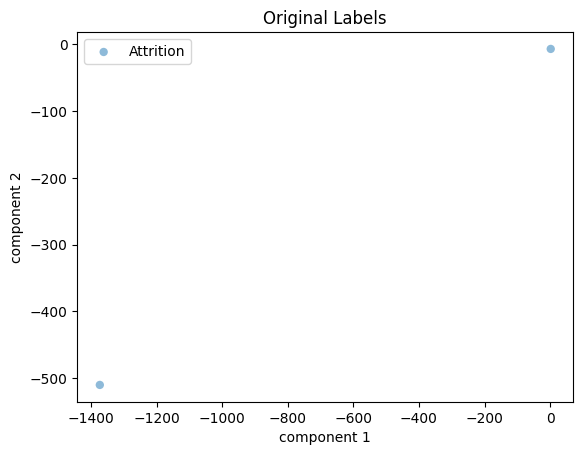

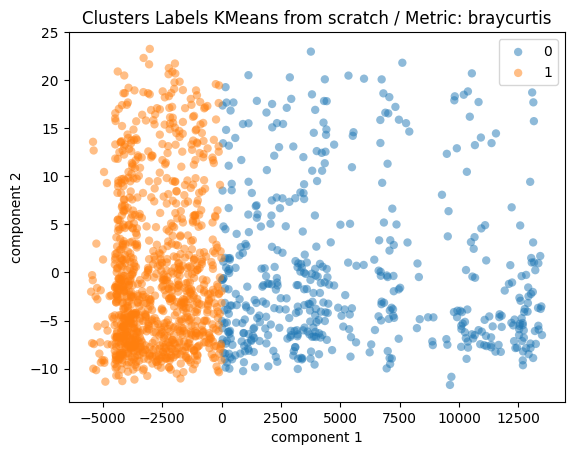

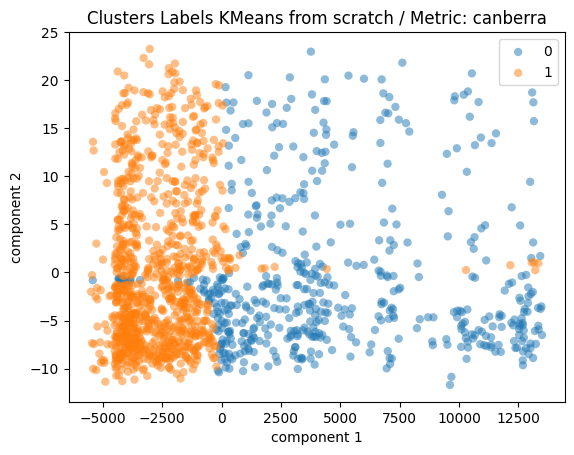

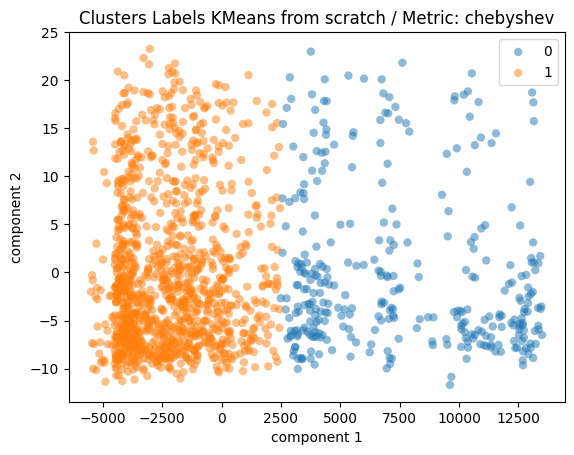

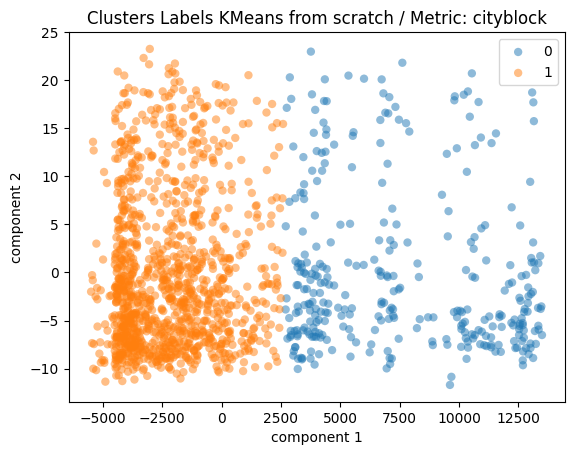

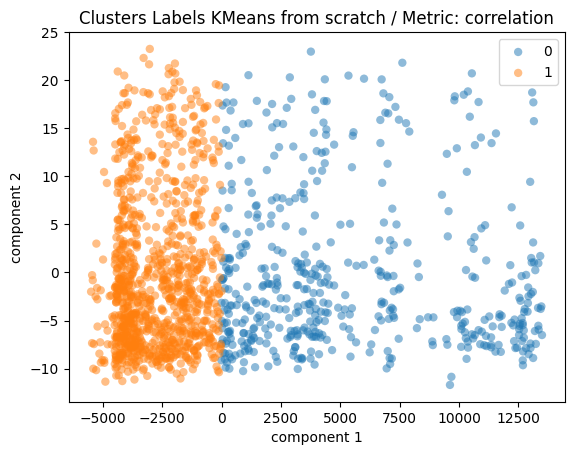

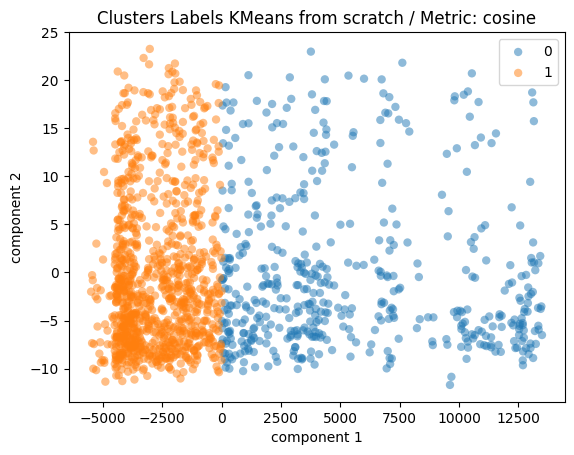

<ipython-input-54-46dfcd7c1e71>:20: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning:

invalid value encountered in true_divide



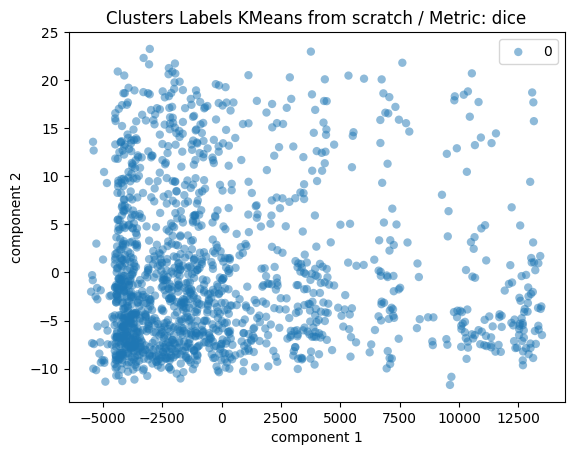

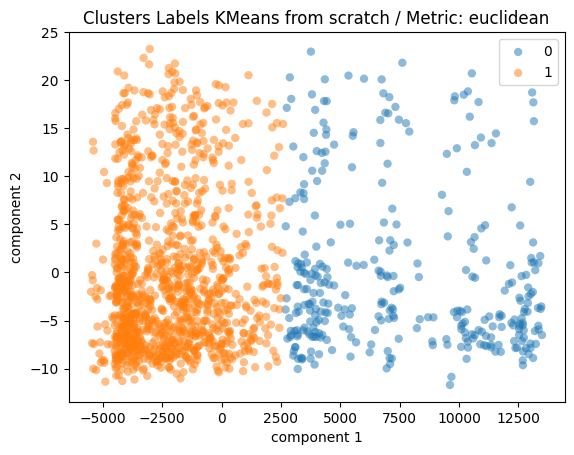

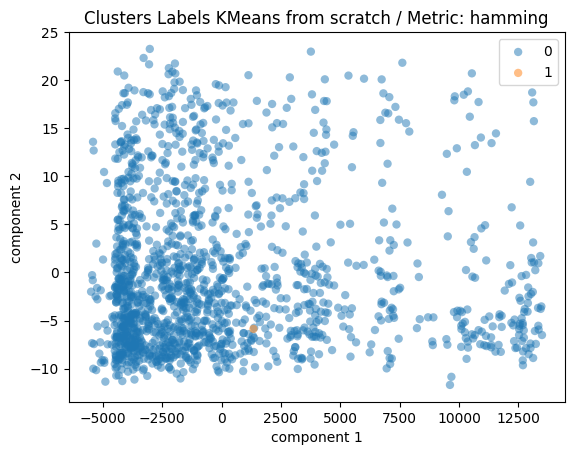

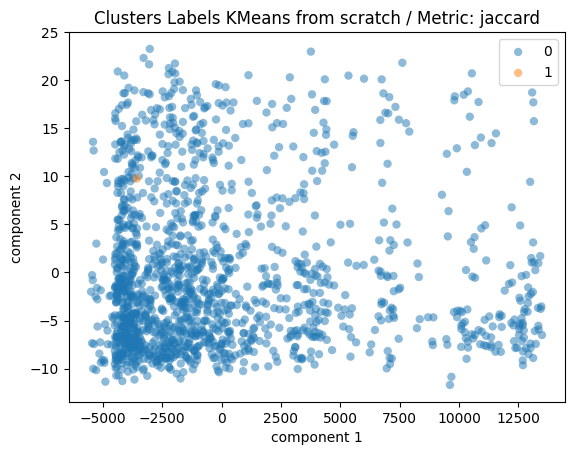

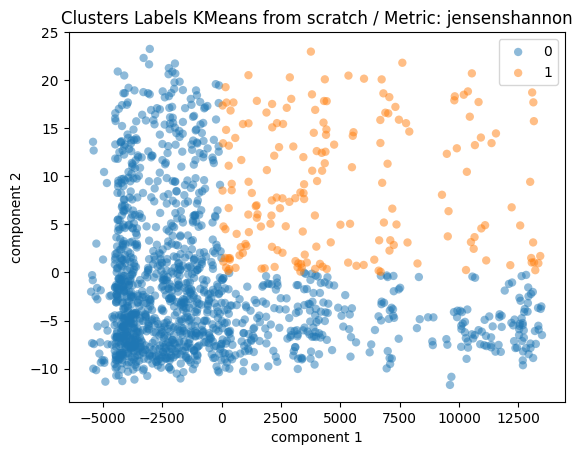

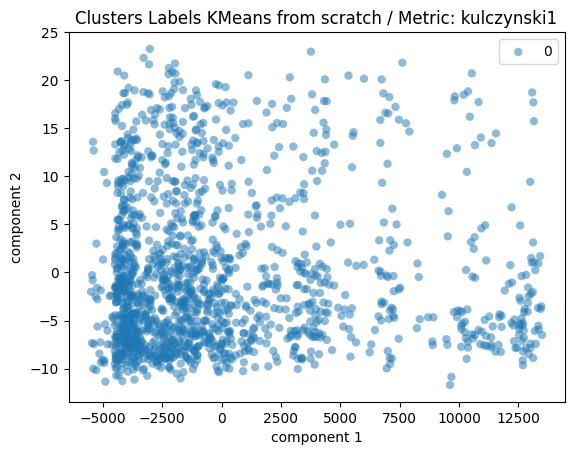

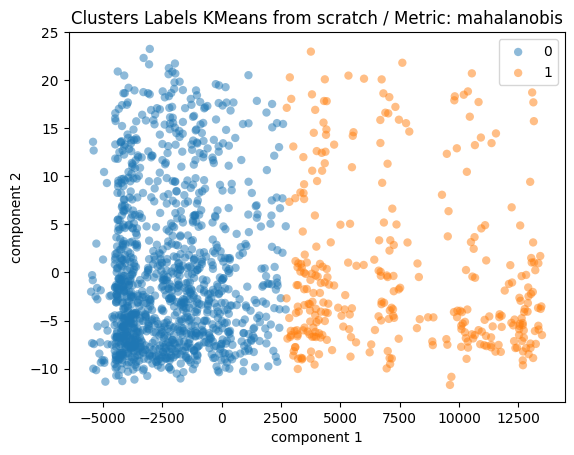

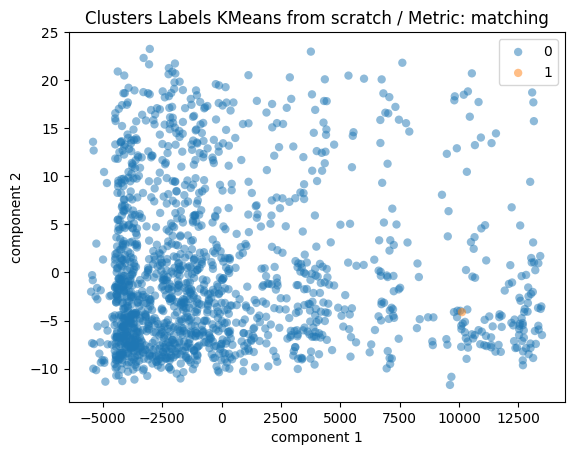

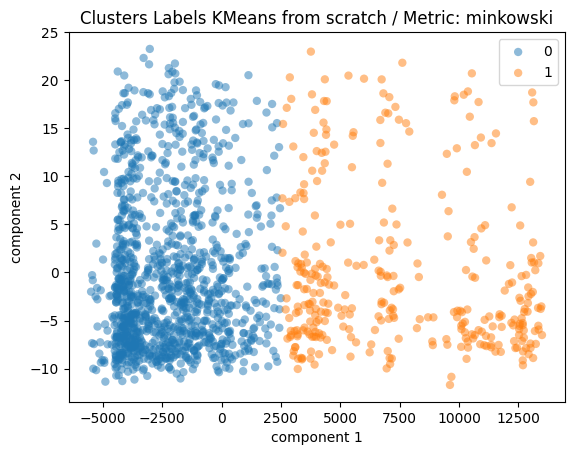

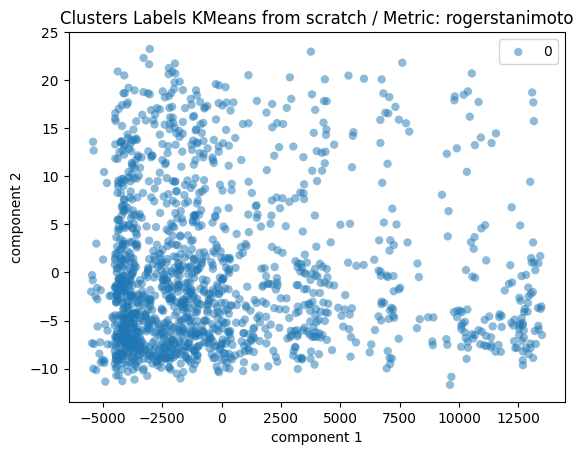

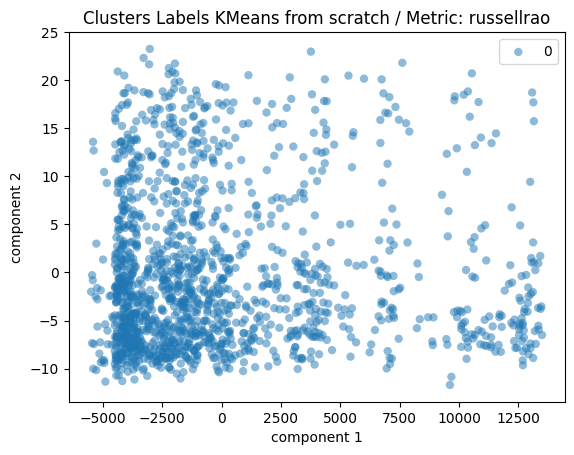

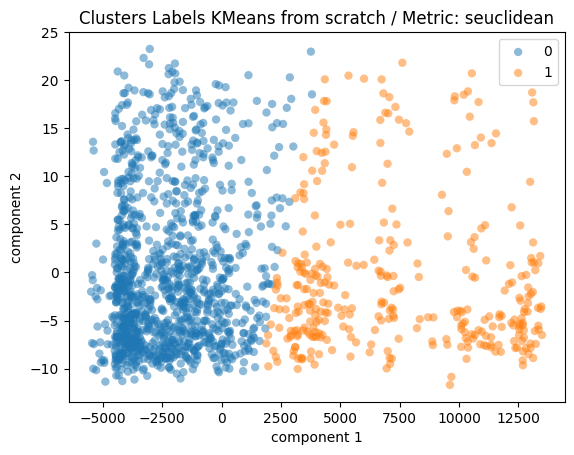

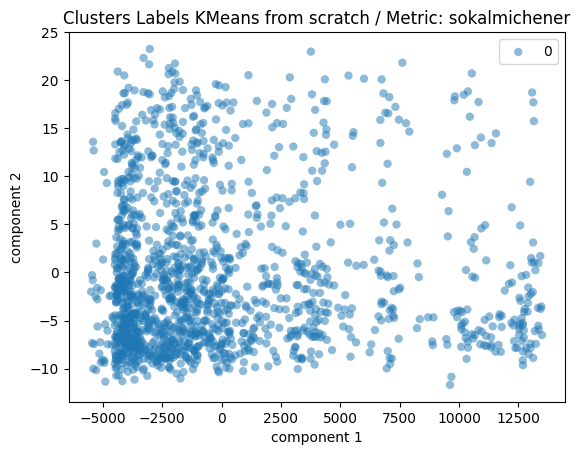

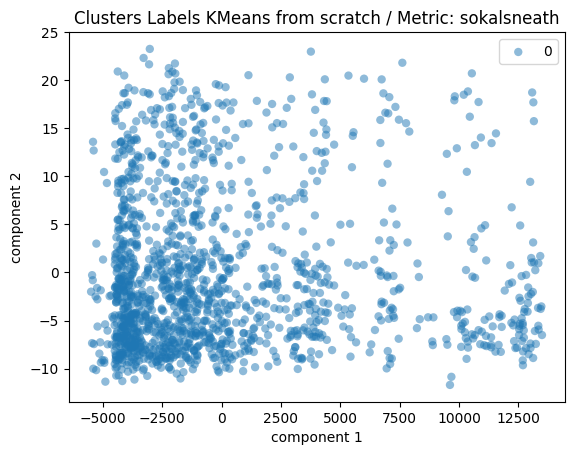

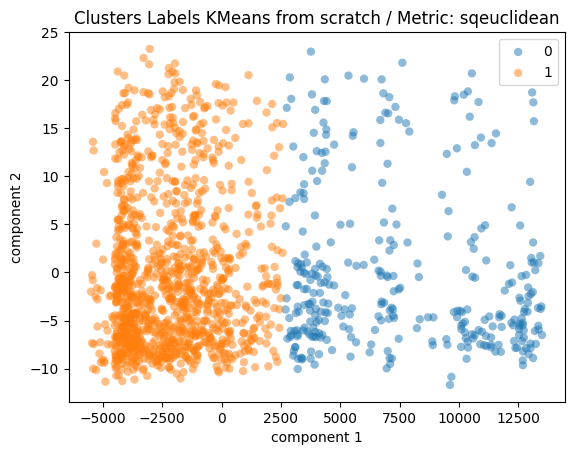

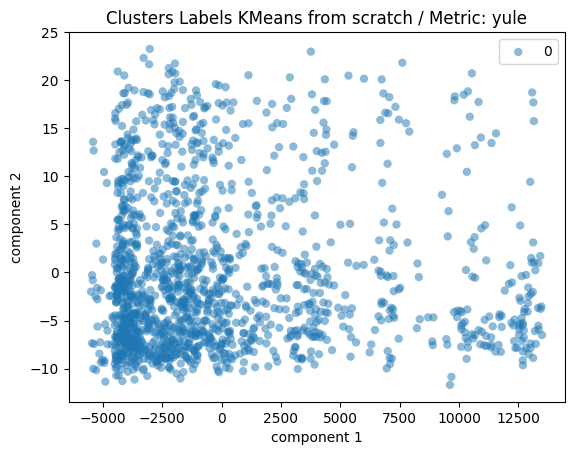

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-54-46dfcd7c1e71>:49: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-54-46dfcd7c1e71>:48: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



8255695186.505501
For n_clusters = 10, silhouette score is 0.7079696880422789)


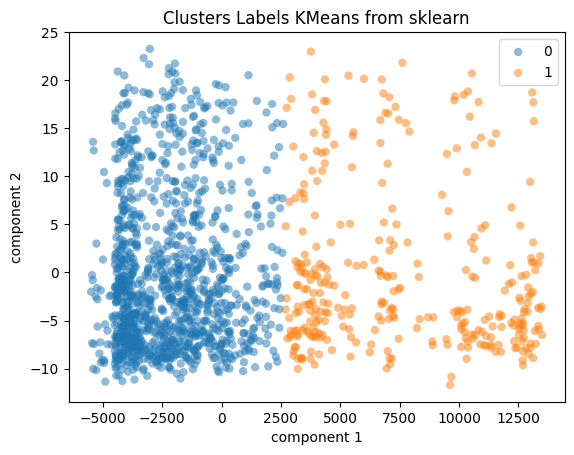

In [ ]:
#Transform the data using PCA
pca = PCA(2)
projected = pca.fit_transform(df)
print(pca.explained_variance_ratio_)
print(df.shape)
print(projected.shape)    
plot_samples(projected, target, 'Original Labels')


metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
for i in metrics: 
    #Applying our kmeans function from scratch
    labels = KMeans_scratch(projected,2,5, i)

    #Visualize the results 
    plot_samples(projected, labels, f'Clusters Labels KMeans from scratch / Metric: {i}')
    plt.show()

#Applying sklearn kmeans function
kmeans = KMeans(n_clusters=2).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)    
print("For n_clusters = {}, silhouette score is {})".format(10, score))

#Visualize the results sklearn
plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

plt.show()


### Implementação para cada atributo

**Insights from K-Means:**
K-Means clustering can provide several insights, including:

1.  Identification of distinct groups: K-Means helps identify clusters or groups within your data. Each cluster represents a subset of similar data points.
2.  Feature importance: By examining the centroids (mean values) of each cluster, you can determine the importance of features in differentiating the clusters.
3.  Employee attrition patterns: K-Means can help identify patterns or trends related to employee attrition. You can analyze clusters with a higher attrition rate and observe the common characteristics of those employees.

4. Segmentation: Clustering allows you to segment your employees into different groups based on similar attributes. This can be useful for targeted interventions or tailored HR policies for different segments.







In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


The elbow method is a technique used to determine the optimal number of clusters in K-Means clustering. It is based on the principle that as the number of clusters increases, the within-cluster sum of squares (inertia) tends to decrease. The elbow method helps identify the point of diminishing returns, where the rate of decrease in inertia significantly slows down.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

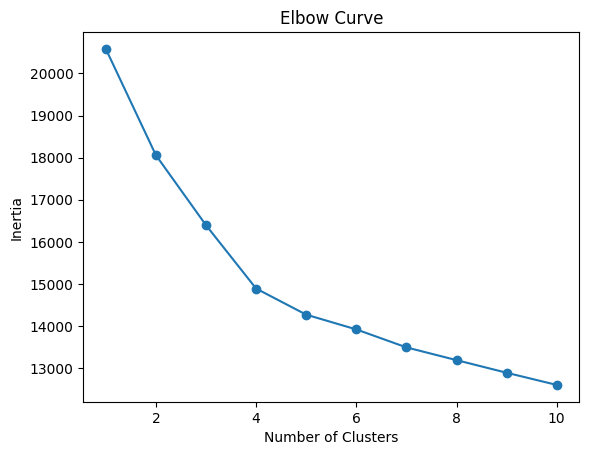

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()


In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

df_cluster = df_numerical.copy()

# Get the cluster labels
df_cluster["Cluster"] = kmeans.labels_




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### Age vs. MonthlyIncome
By plotting the clusters based on the employees' age and monthly income, you can observe if there are any distinct patterns or trends in terms of age and income levels among different clusters. This may help identify clusters of employees with similar age and income profiles.

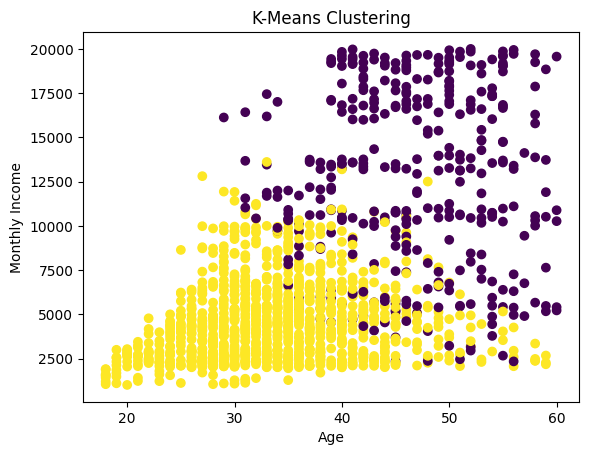

In [ ]:
plt.scatter(df["Age"], df["MonthlyIncome"], c=df["Cluster"])
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("K-Means Clustering")
plt.show()


#### JobSatisfaction vs. EnvironmentSatisfaction
Plotting the clusters based on job satisfaction and environment satisfaction can provide insights into how these two factors contribute to the clustering. You can analyze whether employees with higher job satisfaction and environment satisfaction tend to be in the same cluster, or if there are any variations in satisfaction levels among different clusters.

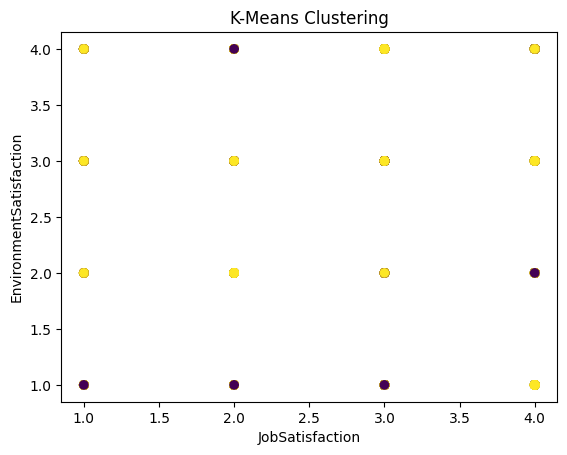

In [ ]:
plt.scatter(df["JobSatisfaction"], df["EnvironmentSatisfaction"], c=df["Cluster"])
plt.xlabel("JobSatisfaction")
plt.ylabel("EnvironmentSatisfaction")
plt.title("K-Means Clustering")
plt.show()


#### YearsAtCompany vs. NumCompaniesWorked
Examining the clusters based on the number of years an employee has spent at the company and the number of companies they have worked for prior to joining IBM can reveal interesting insights. You can analyze whether employees who have spent more years at the company and have fewer previous work experiences form a distinct cluster compared to those who have changed companies frequently.

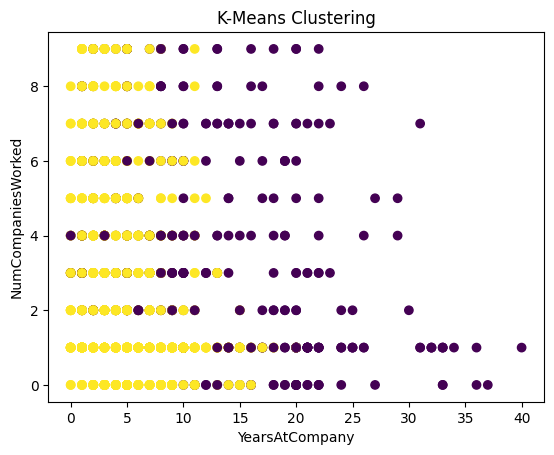

In [ ]:
plt.scatter(df["YearsAtCompany"], df["NumCompaniesWorked"], c=df["Cluster"])
plt.xlabel("YearsAtCompany")
plt.ylabel("NumCompaniesWorked")
plt.title("K-Means Clustering")
plt.show()

#### Age vs Attrition
 Plotting "Attrition" against "Age" can provide insights into attrition patterns across different age groups. You can examine if there are any trends related to attrition, such as higher attrition rates among younger or older employees. This insight can guide efforts in creating age-inclusive retention strategies.

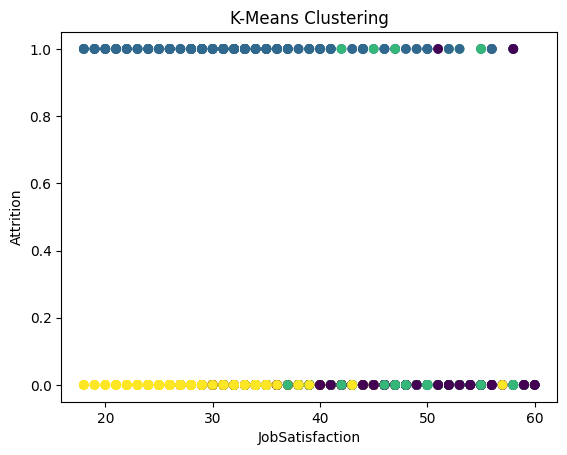

In [ ]:
plt.scatter(df["Age"], df["Attrition"], c=df["Cluster"])
plt.xlabel("JobSatisfaction")
plt.ylabel("Attrition")
plt.title("K-Means Clustering")
plt.show()

#### MonthlyIncome vs Attrition
Can provide insights into the relationship between income levels and attrition. You can analyze if there is a correlation between lower income and higher attrition rates. This information can guide discussions around compensation and its impact on employee turnover.

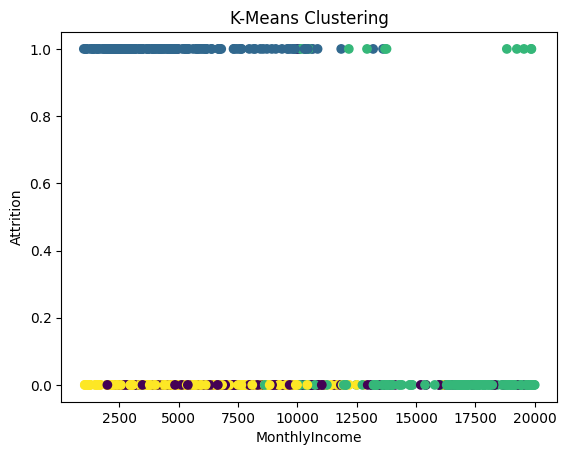

In [ ]:
plt.scatter(df["MonthlyIncome"], df["Attrition"], c=df["Cluster"])
plt.xlabel("MonthlyIncome")
plt.ylabel("Attrition")
plt.title("K-Means Clustering")
plt.show()

#### YearsAtCompany vs Attrition 
Can identify any patterns related to employees' tenure at the company and attrition. It can help determine if there is a higher attrition rate among employees who have been with the company for a shorter duration. This insight can indicate the need for strategies to improve employee retention in the early years.

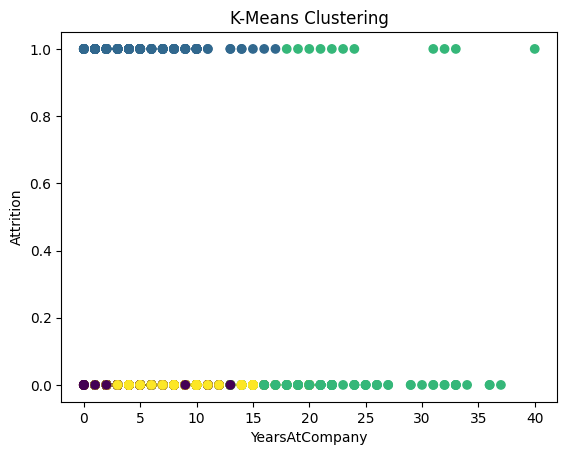

In [ ]:
plt.scatter(df["YearsAtCompany"], df["Attrition"], c=df["Cluster"])
plt.xlabel("YearsAtCompany")
plt.ylabel("Attrition")
plt.title("K-Means Clustering")
plt.show()

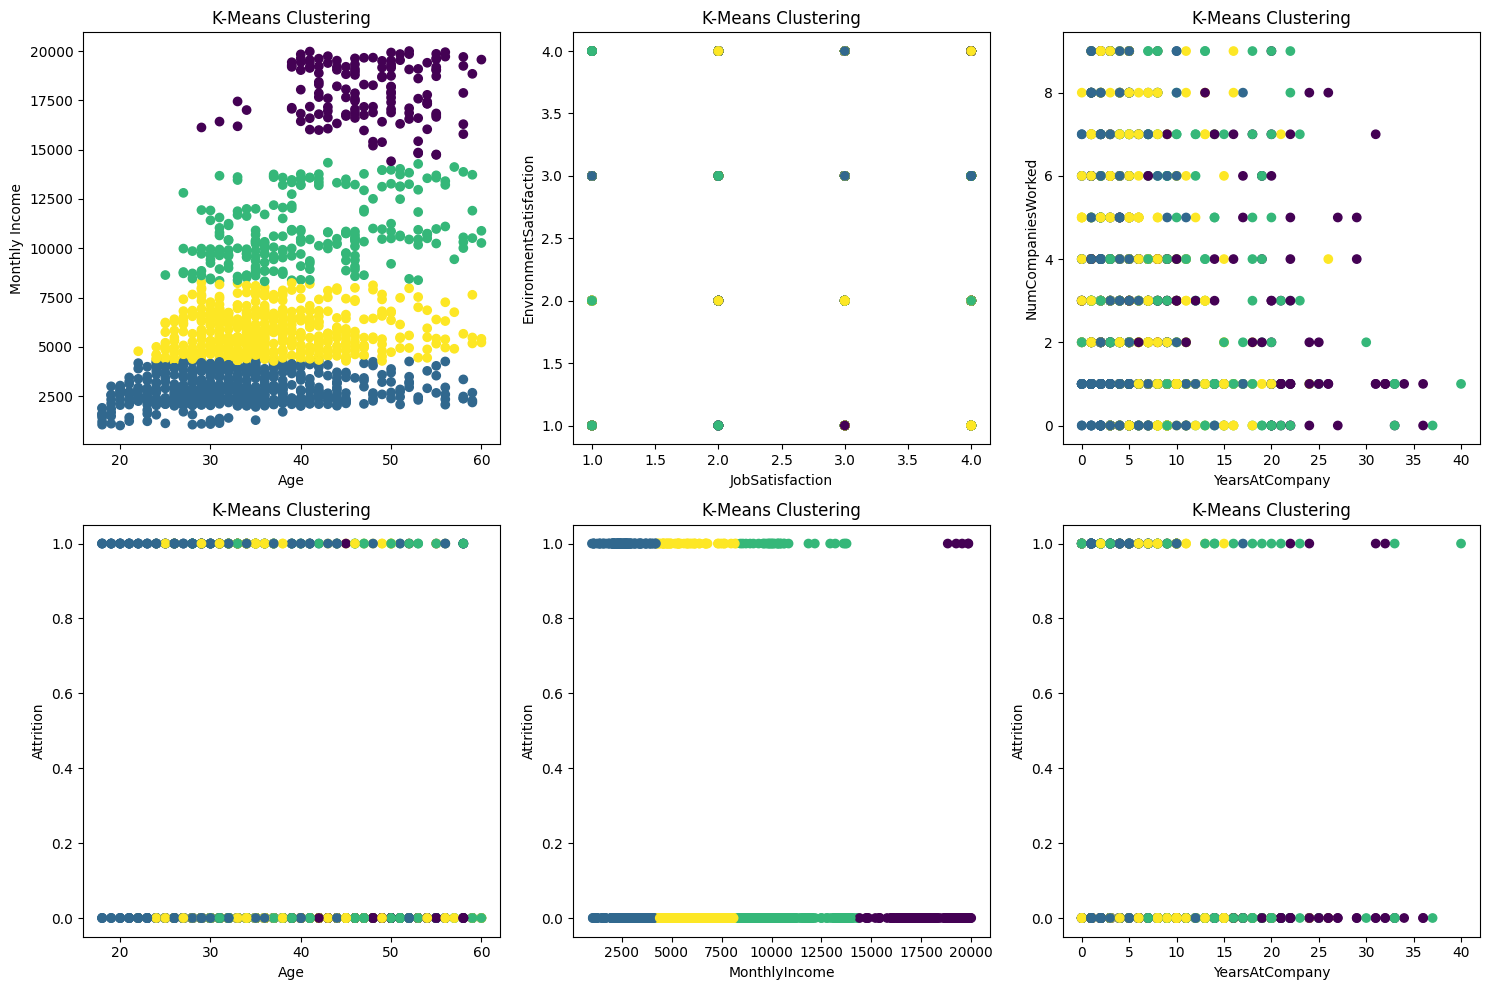

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Criar uma grade de subplots com 2 linhas e 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Age vs. MonthlyIncome
axes[0, 0].scatter(df_cluster["Age"], df_cluster["MonthlyIncome"], c=df_cluster["Cluster"])
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Monthly Income")
axes[0, 0].set_title("K-Means Clustering")

# Plot JobSatisfaction vs. EnvironmentSatisfaction
axes[0, 1].scatter(df_cluster["JobSatisfaction"], df_cluster["EnvironmentSatisfaction"], c=df_cluster["Cluster"])
axes[0, 1].set_xlabel("JobSatisfaction")
axes[0, 1].set_ylabel("EnvironmentSatisfaction")
axes[0, 1].set_title("K-Means Clustering")

# Plot YearsAtCompany vs. NumCompaniesWorked
axes[0, 2].scatter(df_cluster["YearsAtCompany"], df_cluster["NumCompaniesWorked"], c=df_cluster["Cluster"])
axes[0, 2].set_xlabel("YearsAtCompany")
axes[0, 2].set_ylabel("NumCompaniesWorked")
axes[0, 2].set_title("K-Means Clustering")

# Plot Age vs. Attrition
axes[1, 0].scatter(df_cluster["Age"], df_cluster["Attrition"], c=df_cluster["Cluster"])
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Attrition")
axes[1, 0].set_title("K-Means Clustering")

# Plot MonthlyIncome vs. Attrition
axes[1, 1].scatter(df_cluster["MonthlyIncome"], df_cluster["Attrition"], c=df_cluster["Cluster"])
axes[1, 1].set_xlabel("MonthlyIncome")
axes[1, 1].set_ylabel("Attrition")
axes[1, 1].set_title("K-Means Clustering")

# Plot YearsAtCompany vs. Attrition
axes[1, 2].scatter(df_cluster["YearsAtCompany"], df_cluster["Attrition"], c=df_cluster["Cluster"])
axes[1, 2].set_xlabel("YearsAtCompany")
axes[1, 2].set_ylabel("Attrition")
axes[1, 2].set_title("K-Means Clustering")

# Ajustar a posição dos subplots para evitar sobreposições
plt.tight_layout()

# Exibir a imagem com todos os gráficos
plt.show()


## 5.2 GMM

In [ ]:
from sklearn.mixture import GaussianMixture

[0.69388669 0.30611331]
[[-2.47672530e+03 -2.78506481e-01]
 [ 5.61415236e+03  6.31308532e-01]]


<ipython-input-54-46dfcd7c1e71>:49: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-54-46dfcd7c1e71>:48: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



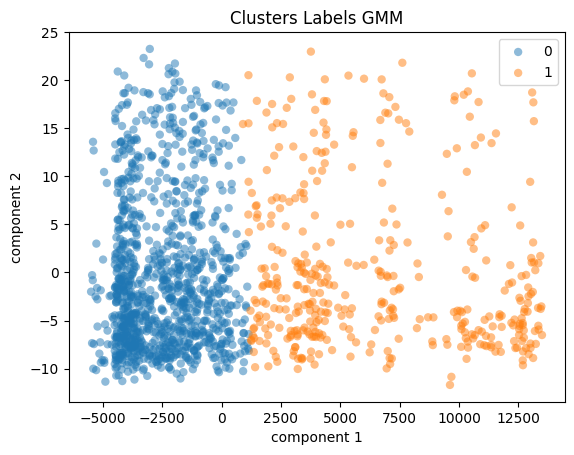

In [ ]:
#Applying sklearn GMM function
gm  = GaussianMixture(n_components=2).fit(projected)
print(gm.weights_)
print(gm.means_)
x = gm.predict(projected)

#Visualize the results sklearn
plot_samples(projected, x, 'Clusters Labels GMM')

plt.show()

### Implementação para cada atributo

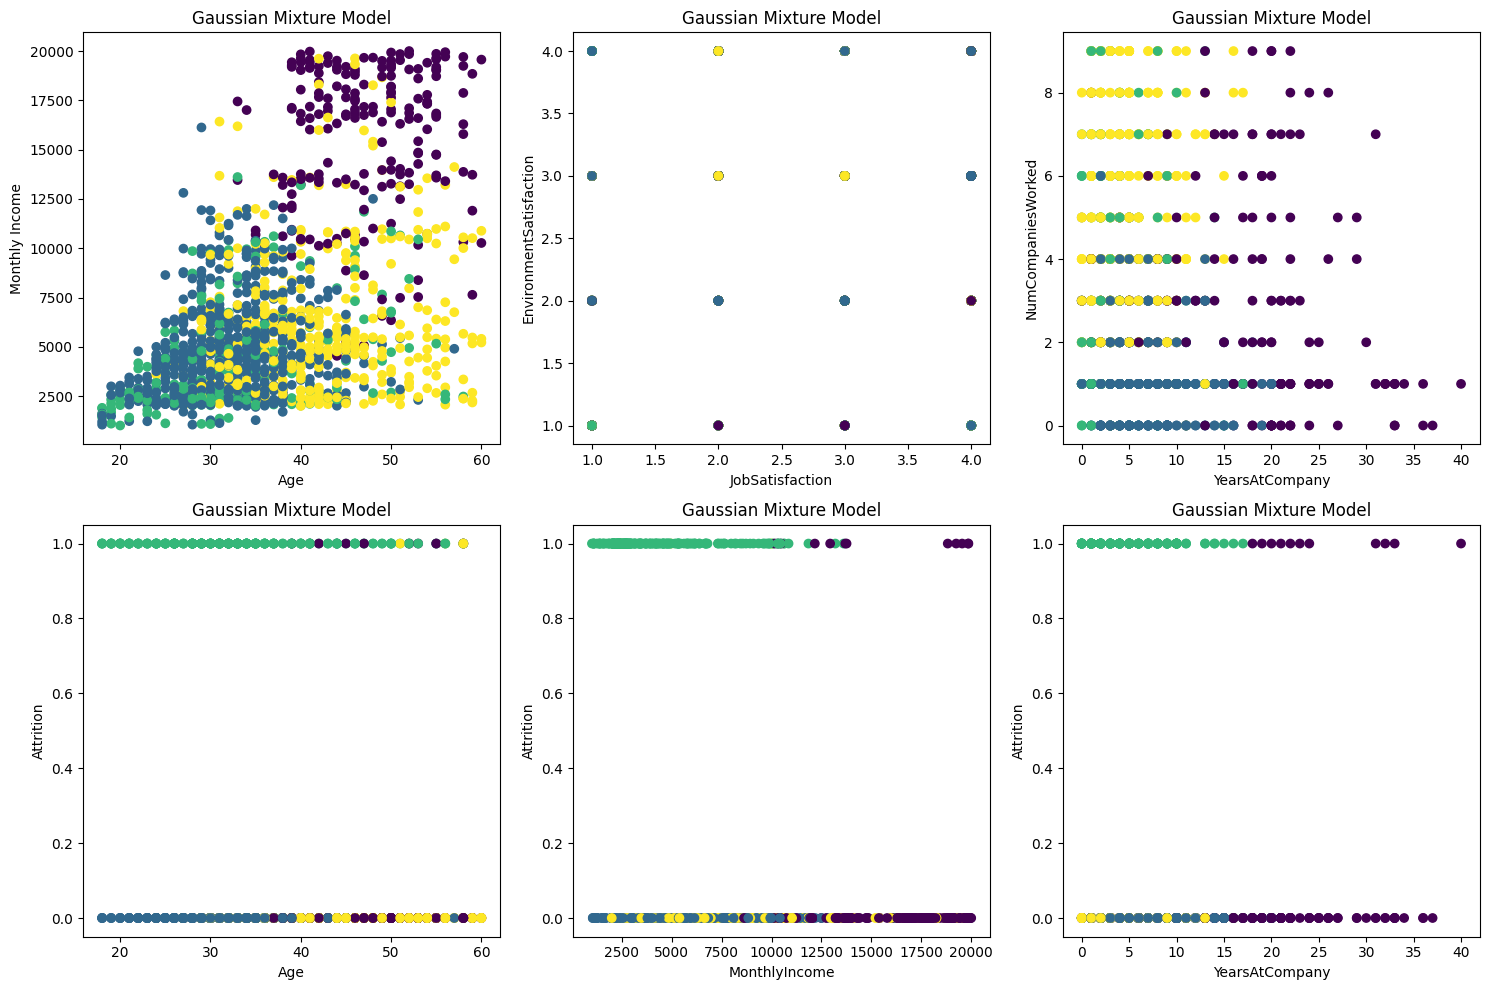

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

# Calcular o BIC para diferentes números de componentes
bic = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_data)
    bic.append(gmm.bic(scaled_data))

# Escolher o número ideal de componentes com base no BIC
k = 4  # Número de clusters
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(scaled_data)

df_cluster = df_numerical.copy()

# Adicionar os rótulos de cluster previstos ao conjunto de dados original
df_cluster["Cluster"] = gmm.predict(scaled_data)

# Criar uma grade de subplots com 2 linhas e 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Age vs. MonthlyIncome
axes[0, 0].scatter(df_cluster["Age"], df_cluster["MonthlyIncome"], c=df_cluster["Cluster"])
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Monthly Income")
axes[0, 0].set_title("Gaussian Mixture Model")

# Plot JobSatisfaction vs. EnvironmentSatisfaction
axes[0, 1].scatter(df_cluster["JobSatisfaction"], df_cluster["EnvironmentSatisfaction"], c=df_cluster["Cluster"])
axes[0, 1].set_xlabel("JobSatisfaction")
axes[0, 1].set_ylabel("EnvironmentSatisfaction")
axes[0, 1].set_title("Gaussian Mixture Model")

# Plot YearsAtCompany vs. NumCompaniesWorked
axes[0, 2].scatter(df_cluster["YearsAtCompany"], df_cluster["NumCompaniesWorked"], c=df_cluster["Cluster"])
axes[0, 2].set_xlabel("YearsAtCompany")
axes[0, 2].set_ylabel("NumCompaniesWorked")
axes[0, 2].set_title("Gaussian Mixture Model")

# Plot Age vs. Attrition
axes[1, 0].scatter(df_cluster["Age"], df_cluster["Attrition"], c=df_cluster["Cluster"])
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Attrition")
axes[1, 0].set_title("Gaussian Mixture Model")

# Plot MonthlyIncome vs. Attrition
axes[1, 1].scatter(df_cluster["MonthlyIncome"], df_cluster["Attrition"], c=df_cluster["Cluster"])
axes[1, 1].set_xlabel("MonthlyIncome")
axes[1, 1].set_ylabel("Attrition")
axes[1, 1].set_title("Gaussian Mixture Model")

# Plot YearsAtCompany vs. Attrition
axes[1, 2].scatter(df_cluster["YearsAtCompany"], df_cluster["Attrition"], c=df_cluster["Cluster"])
axes[1, 2].set_xlabel("YearsAtCompany")
axes[1, 2].set_ylabel("Attrition")
axes[1, 2].set_title("Gaussian Mixture Model")

# Ajustar a posição dos subplots para evitar sobreposições
plt.tight_layout()

# Exibir a imagem com todos os gráficos
plt.show()


## 5.3 Avaliação da Qualidade dos Agrupamentos

K-means Clustering:
Silhouette Score: 0.019462409373640854
Homogeneity Score: 0.043422395513212635
Completeness Score: 0.015384437445044944

GMM Clustering:
Silhouette Score: 0.17048789022923402
Homogeneity Score: 0.8954002905449447
Completeness Score: 0.3104092701885239


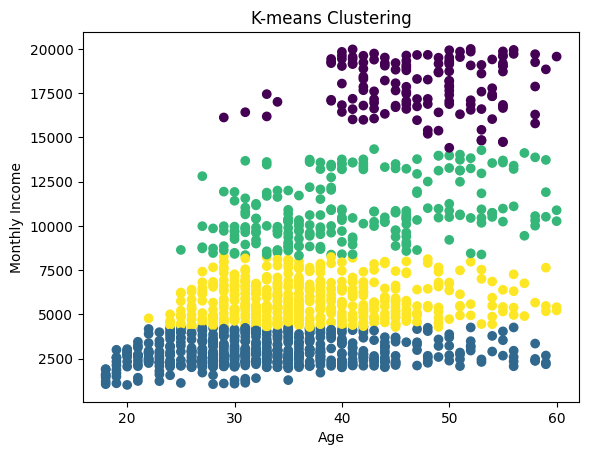

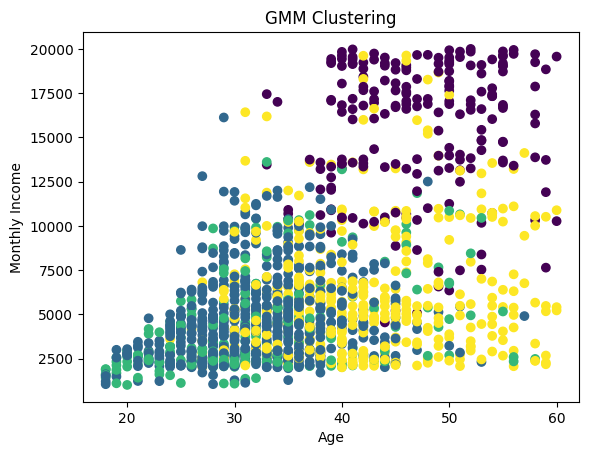

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score


# Get the cluster labels
kmeans_labels = kmeans.labels_


# Get the cluster labels
gmm_labels = gmm.predict(scaled_data)

# Calculate the clustering evaluation metrics
silhouette_avg_kmeans = silhouette_score(scaled_data, kmeans_labels)
homogeneity_kmeans = homogeneity_score(df_numerical['Attrition'], kmeans_labels)
completeness_kmeans = completeness_score(df_numerical['Attrition'], kmeans_labels)

silhouette_avg_gmm = silhouette_score(scaled_data, gmm_labels)
homogeneity_gmm = homogeneity_score(df_numerical['Attrition'], gmm_labels)
completeness_gmm = completeness_score(df_numerical['Attrition'], gmm_labels)

print("K-means Clustering:")
print("Silhouette Score:", silhouette_avg_kmeans)
print("Homogeneity Score:", homogeneity_kmeans)
print("Completeness Score:", completeness_kmeans)

print("\nGMM Clustering:")
print("Silhouette Score:", silhouette_avg_gmm)
print("Homogeneity Score:", homogeneity_gmm)
print("Completeness Score:", completeness_gmm)

# Plot K-means clustering
plt.scatter(df_numerical['Age'], df_numerical['MonthlyIncome'], c=kmeans_labels)
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('K-means Clustering')
plt.show()

# Plot GMM clustering
plt.scatter(df_numerical['Age'], df_numerical['MonthlyIncome'], c=gmm_labels)
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('GMM Clustering')
plt.show()


Silhouette Score:
The silhouette score measures how well each data point within a cluster is separated from other clusters. Higher silhouette scores indicate better-defined and well-separated clusters. You can calculate the silhouette score using the silhouette_score function from the sklearn.metrics module.


Homogeneity Score:
The homogeneity score measures the extent to which each cluster contains only data points that belong to a single class. Higher homogeneity scores indicate that the clusters are more pure and contain data points from a single class. You can calculate the homogeneity score using the homogeneity_score function from the sklearn.metrics module.

Completeness Score:
The completeness score measures the extent to which all data points of a given class are assigned to the same cluster. Higher completeness scores indicate that the clusters capture all data points from a single class. You can calculate the completeness score using the completeness_score function from the sklearn.metrics module.

In [ ]:
from tabulate import tabulate
# Create a DataFrame of the scores
data = [
    ['K-means', silhouette_avg_kmeans, homogeneity_kmeans, completeness_kmeans],
    ['GMM', silhouette_avg_gmm, homogeneity_gmm, completeness_gmm]
]
headers = ['Algorithm', 'Silhouette Score', 'Homogeneity Score', 'Completeness Score']
df_scores = pd.DataFrame(data, columns=headers)

# Display the scores table
print(tabulate(df_scores, headers='keys', tablefmt='psql'))

+----+-------------+--------------------+---------------------+----------------------+
|    | Algorithm   |   Silhouette Score |   Homogeneity Score |   Completeness Score |
|----+-------------+--------------------+---------------------+----------------------|
|  0 | K-means     |          0.0194624 |           0.0434224 |            0.0153844 |
|  1 | GMM         |          0.170488  |           0.8954    |            0.310409  |
+----+-------------+--------------------+---------------------+----------------------+


In [ ]:
# Convert the DataFrame to LaTeX format
latex_table = df_scores.to_latex(index=False, escape=False)

# Display the LaTeX table
print(latex_table)

\begin{tabular}{lrrr}
\toprule
Algorithm &  Silhouette Score &  Homogeneity Score &  Completeness Score \\
\midrule
  K-means &          0.019462 &           0.043422 &            0.015384 \\
      GMM &          0.170488 &           0.895400 &            0.310409 \\
\bottomrule
\end{tabular}



<ipython-input-98-a66c214ab1b0>:2: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



# 6. Classificação

## 6.1 Árvore de Decisão

#### Holdout (Treinamento 70% e Teste 30%)

Accuracy: 0.750390015600624
Confusion Matrix:
[[221  93]
 [ 67 260]]
F1-Score: 0.7647058823529411


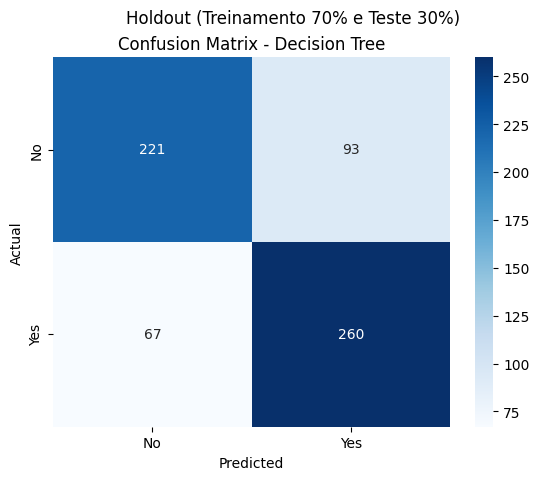

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
X = df_balanced.drop("Attrition", axis=1)
y = df_balanced["Attrition"]

#  Map string labels to numeric labels
# label_map = {"No": 0, "Yes": 1}
# y = y.map(label_map)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict using the trained classifier
y_pred = clf.predict(X_test)

# Calculate accuracy
dt_holdout_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_holdout_accuracy)

# Calculate confusion matrix
dt_holdout_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(dt_holdout_cm)

# Calculate F1-Score
dt_holdout_f1 = f1_score(y_test, y_pred)
print("F1-Score:", dt_holdout_f1)

# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(dt_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.suptitle("Holdout (Treinamento 70% e Teste 30%)")
plt.show()


In [ ]:
import numpy as np

# Calculate confusion matrix
dt_holdout_cm = confusion_matrix(y_test, y_pred)

# Create the label row
label_row = " & ".join([""] + ["\\text{" + label + "}" for label in labels])

# Create LaTeX code for the confusion matrix
matrix_latex = "\\text{Matriz de Confusão - Árvore de Decisão}\n"
matrix_latex += "\\begin{bmatrix}\n"
matrix_latex += label_row + " \\\\\n"
matrix_latex += "\\\\\n".join(["\\text{" + labels[i] + "} & " + " & ".join(map(str, row)) for i, row in enumerate(dt_holdout_cm)])
matrix_latex += "\n\\end{bmatrix}"

# Print the LaTeX code for the confusion matrix
print(matrix_latex)


\text{Matriz de Confusão - Árvore de Decisão}
\begin{bmatrix}
 & \text{No} & \text{Yes} \\
\text{No} & 219 & 95\\
\text{Yes} & 60 & 267
\end{bmatrix}


#### Cross-Validation (k=10)

Accuracy scores: [0.65420561 0.64485981 0.8364486  0.87850467 0.84579439 0.8411215
 0.82159624 0.80751174 0.84976526 0.84507042]
Mean accuracy: 0.8024878241411084
Confusion Matrix:
[[824 244]
 [191 877]]
F1-Score: 0.8012791228871632


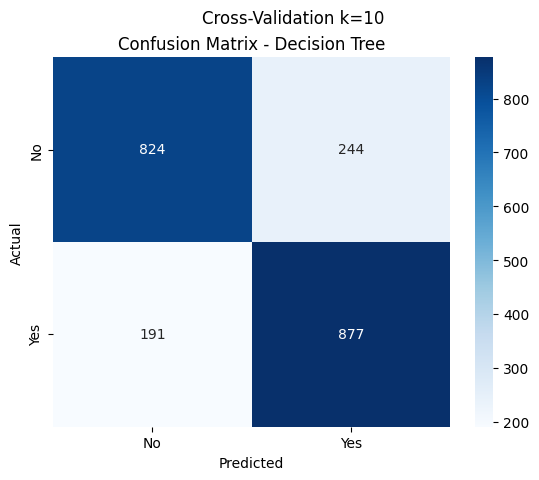

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
X = df_balanced.drop("Attrition", axis=1)
y = df_balanced["Attrition"]

#  Map string labels to numeric labels
# label_map = {"No": 0, "Yes": 1}
# y = y.map(label_map)

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=10)

# Perform cross-validated predictions
y_pred = cross_val_predict(clf, X, y, cv=10)


# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
dt_cv_mean_accuracy = np.mean(scores)
print("Mean accuracy:", dt_cv_mean_accuracy)


# Calculate confusion matrix
dt_cv_cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(dt_cv_cm)

# Calculate F1-Score
dt_cv_f1 = f1_score(y, y_pred)
print("F1-Score:", dt_cv_f1)

# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(dt_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.suptitle("Cross-Validation k=10")
plt.show()


In [ ]:
import numpy as np

# Calculate confusion matrix
dt_cv_cm = confusion_matrix(y, y_pred)

# Create the label row
label_row = " & ".join([""] + ["\\text{" + label + "}" for label in labels])

# Create LaTeX code for the confusion matrix
matrix_latex = "\\text{Matriz de Confusão - Árvore de Decisão - Cross Validation}\n"
matrix_latex += "\\begin{bmatrix}\n"
matrix_latex += label_row + " \\\\\n"
matrix_latex += "\\\\\n".join(["\\text{" + labels[i] + "} & " + " & ".join(map(str, row)) for i, row in enumerate(dt_cv_cm)])
matrix_latex += "\n\\end{bmatrix}"

# Print the LaTeX code for the confusion matrix
print(matrix_latex)

\text{Matriz de Confusão - Árvore de Decisão - Cross Validation}
\begin{bmatrix}
 & \text{No} & \text{Yes} \\
\text{No} & 1023 & 210\\
\text{Yes} & 158 & 79
\end{bmatrix}


#### Formatando Métricas para Latex

In [ ]:
from tabulate import tabulate

metrics_dt = [dt_holdout_accuracy, dt_holdout_f1, dt_cv_mean_accuracy, dt_cv_f1]

# Data for the table
data = [
    ["Holdout (Treinamento=70% e Teste=30%)", dt_holdout_accuracy, dt_holdout_f1],
    ["Cross-Validation k=10", dt_cv_mean_accuracy, dt_cv_f1]
]

# Table headers
headers = ["Evaluation Method", "Accuracy", "F1-Score"]

# Generate LaTeX table
latex_table = tabulate(data, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lrr}
\hline
 Evaluation Method                     &   Accuracy &   F1-Score \\
\hline
 Holdout (Treinamento=70\% e Teste=30\%) &   0.75039  &   0.764706 \\
 Cross-Validation k=10                 &   0.802488 &   0.801279 \\
\hline
\end{tabular}


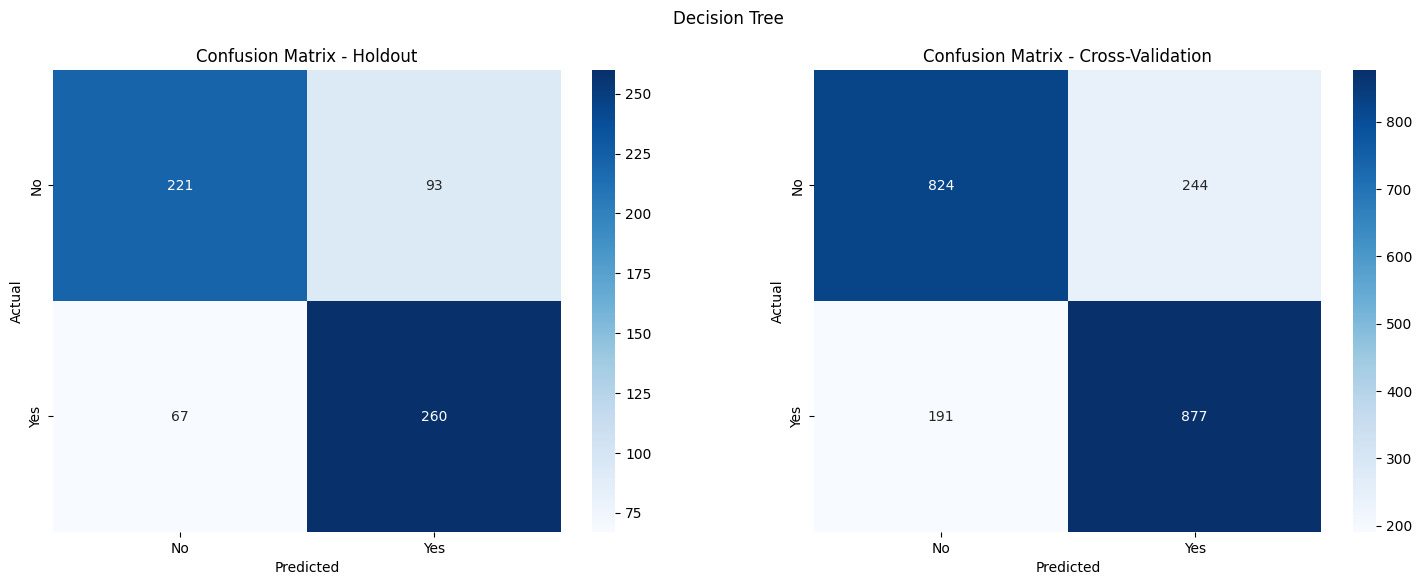

In [ ]:
# Plot the confusion matrix for Holdout
plt.subplot(121)
sns.heatmap(dt_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Holdout")
plt.suptitle("Decision Tree")
plt.subplots_adjust(wspace=0.2)

# Plot the confusion matrix for Cross-Validation
plt.subplot(122)
sns.heatmap(dt_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cross-Validation")

# Increase the width of the figure
fig = plt.gcf()
fig.set_size_inches(18, 6)  # Adjust the width and height as needed


plt.show()

## 6.2 KNN

#### Holdout (Treinamento 70% e Teste 30%)

Accuracy: 0.7893915756630265
F1-score: 0.8143053645116918
Confusion matrix:
 [[210 104]
 [ 31 296]]


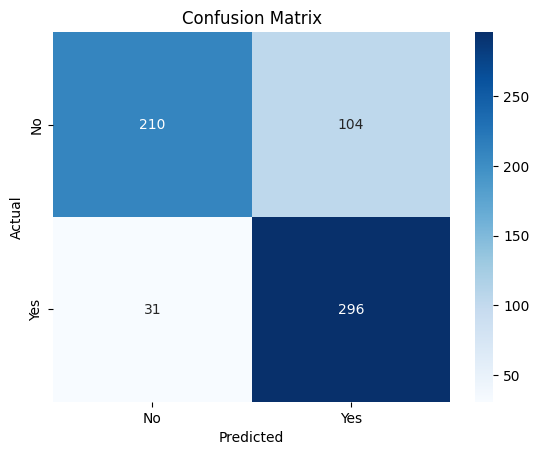

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Prepare the data
X = df_balanced.drop("Attrition", axis=1)
y = df_balanced["Attrition"]

#  Map string labels to numeric labels
# label_map = {"No": 0, "Yes": 1}
# y = y.map(label_map)


# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create an instance of the KNN classifier with k=3 
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train, y_train)


# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
knn_holdout_accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-score
knn_holdout_f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
knn_holdout_cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", knn_holdout_accuracy)
print("F1-score:", knn_holdout_f1)
print("Confusion matrix:\n", knn_holdout_cm)


# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(knn_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np

# Calculate confusion matrix
knn_holdout_cm = confusion_matrix(y_test, y_pred)

# Create the label row
label_row = " & ".join([""] + ["\\text{" + label + "}" for label in labels])

# Create LaTeX code for the confusion matrix
matrix_latex = "\\text{Matriz de Confusão - KNN - Holdout}\n"
matrix_latex += "\\begin{bmatrix}\n"
matrix_latex += label_row + " \\\\\n"
matrix_latex += "\\\\\n".join(["\\text{" + labels[i] + "} & " + " & ".join(map(str, row)) for i, row in enumerate(knn_holdout_cm)])
matrix_latex += "\n\\end{bmatrix}"

# Print the LaTeX code for the confusion matrix
print(matrix_latex)


\text{Matriz de Confusão - KNN - Holdout}
\begin{bmatrix}
 & \text{No} & \text{Yes} \\
\text{No} & 349 & 31\\
\text{Yes} & 53 & 8
\end{bmatrix}


#### Cross-Validation (k=10)

Accuracy scores: [0.77102804 0.78037383 0.81775701 0.8411215  0.81308411 0.86915888
 0.81220657 0.83098592 0.81690141 0.82629108]
Mean accuracy: 0.8178908341011801
F1-Score: 0.8366232675346493
Confusion Matrix:
[[751 317]
 [ 72 996]]


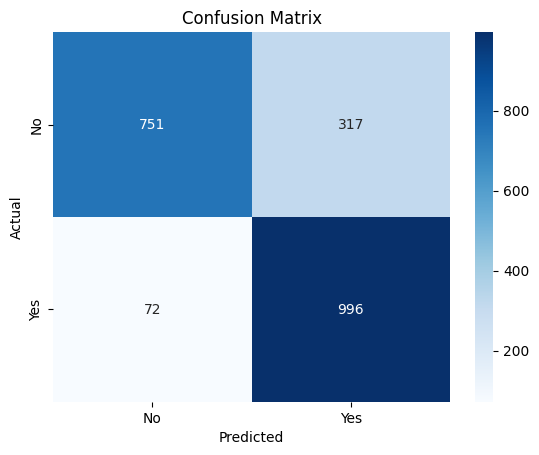

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier


# Prepare the data
X = df_balanced.drop("Attrition", axis=1)
y = df_balanced["Attrition"]

#  Map string labels to numeric labels
# label_map = {"No": 0, "Yes": 1}
# y = y.map(label_map)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Create an instance of the KNN classifier with k=3 (you can choose a different value)
knn = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
scores = cross_val_score(knn, X, y, cv=10)

# Perform cross-validated predictions
y_pred = cross_val_predict(knn, X, y, cv=10)

# Calculate F1-score
knn_cv_f1 = f1_score(y, y_pred)

# Calculate confusion matrix
knn_cv_cm = confusion_matrix(y, y_pred)

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
knn_cv_mean_accuracy = np.mean(scores)
print("Mean accuracy:", knn_cv_mean_accuracy)
print("F1-Score:", knn_cv_f1)
print("Confusion Matrix:")
print(knn_cv_cm)


# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(knn_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np

# Create the label row
label_row = " & ".join([""] + ["\\text{" + label + "}" for label in labels])

# Create LaTeX code for the confusion matrix
matrix_latex = "\\text{Matriz de Confusão - KNN - Cross-Validation}\n"
matrix_latex += "\\begin{bmatrix}\n"
matrix_latex += label_row + " \\\\\n"
matrix_latex += "\\\\\n".join(["\\text{" + labels[i] + "} & " + " & ".join(map(str, row)) for i, row in enumerate(knn_cv_cm)])
matrix_latex += "\n\\end{bmatrix}"

# Print the LaTeX code for the confusion matrix
print(matrix_latex)


\text{Matriz de Confusão - KNN - Cross-Validation}
\begin{bmatrix}
 & \text{No} & \text{Yes} \\
\text{No} & 1158 & 75\\
\text{Yes} & 199 & 38
\end{bmatrix}


#### Formatando Métricas para Latex

In [ ]:
from tabulate import tabulate

metrics_knn = [knn_holdout_accuracy, knn_holdout_f1, knn_cv_mean_accuracy, knn_cv_f1]

# Data for the table
data = [
    ["Holdout (Treinamento=70% e Teste=30%)", knn_holdout_accuracy, knn_holdout_f1],
    ["Cross-Validation k=10", knn_cv_mean_accuracy, knn_cv_f1]
]

# Table headers
headers = ["Evaluation Method", "Accuracy", "F1-Score"]

# Generate LaTeX table
latex_table = tabulate(data, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lrr}
\hline
 Evaluation Method                     &   Accuracy &   F1-Score \\
\hline
 Holdout (Treinamento=70\% e Teste=30\%) &   0.789392 &   0.814305 \\
 Cross-Validation k=10                 &   0.817891 &   0.836623 \\
\hline
\end{tabular}


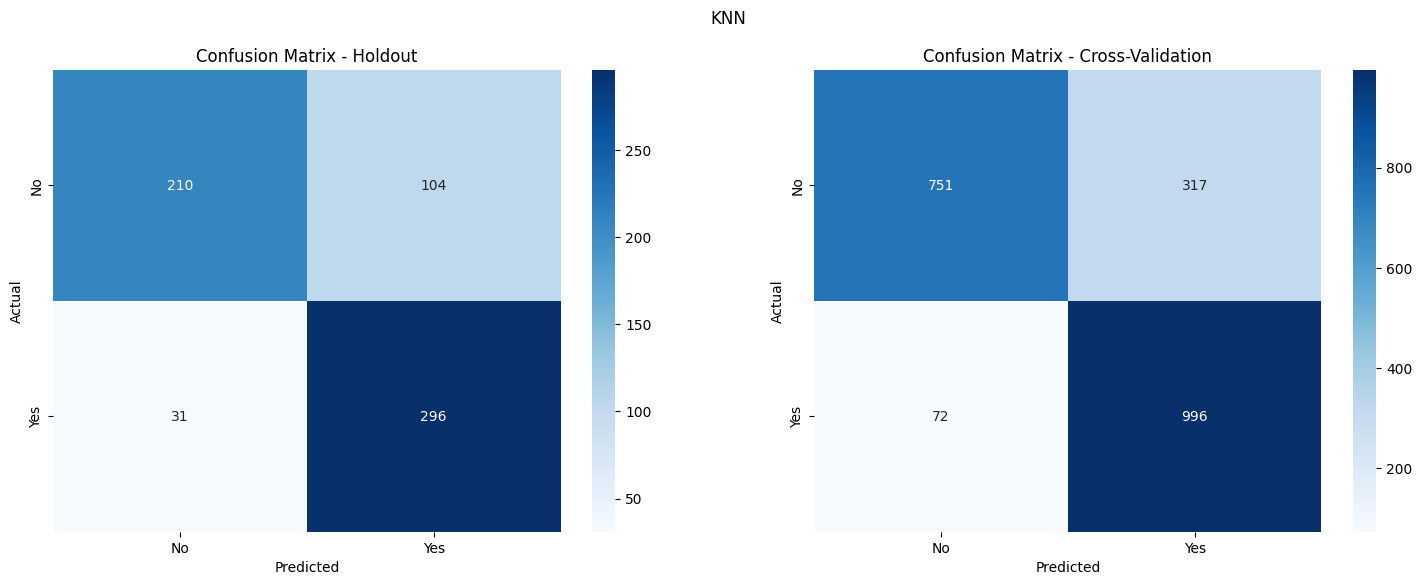

In [ ]:
# Plot the confusion matrix for Holdout
plt.subplot(121)
sns.heatmap(knn_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Holdout")
plt.suptitle("KNN")
plt.subplots_adjust(wspace=0.2)

# Plot the confusion matrix for Cross-Validation
plt.subplot(122)
sns.heatmap(knn_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cross-Validation")

# Increase the width of the figure
fig = plt.gcf()
fig.set_size_inches(18, 6)  # Adjust the width and height as needed


plt.show()

## 6.3 SVM

#### Holdout (Treinamento 70% e Teste 30%)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8642745709828393
F1-score: 0.8497409326424871
Confusion matrix:
 [[308   6]
 [ 81 246]]


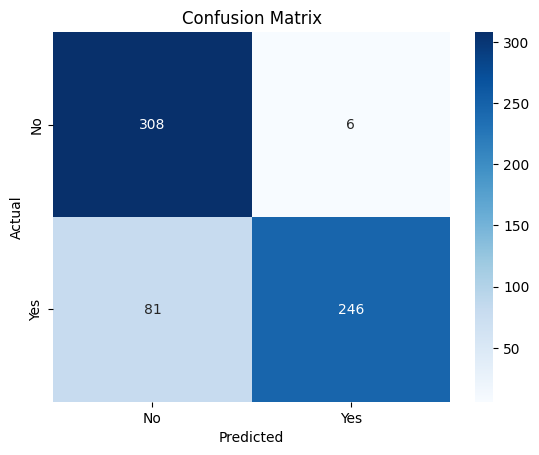

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Prepare the data
X = df_balanced.drop("Attrition", axis=1)
y = df_balanced["Attrition"]

# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
X['Department'] = label_encoder.fit_transform(X['Department'])
X['EducationField'] = label_encoder.fit_transform(X['EducationField'])
X['MaritalStatus'] = label_encoder.fit_transform(X['MaritalStatus'])

# Perform feature scaling on numerical variables
scaler = StandardScaler()
X[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']] = scaler.fit_transform(X[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']])

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Instantiate an SVM classifier
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the search
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_svm.predict(X_test)

# Calculate accuracy
svm_holdout_accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-score
svm_holdout_f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
svm_holdout_cm = confusion_matrix(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", svm_holdout_accuracy)
print("F1-score:", svm_holdout_f1)
print("Confusion matrix:\n", svm_holdout_cm)

# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(svm_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np

# Calculate confusion matrix
svm_holdout_cm = confusion_matrix(y_test, y_pred)

# Create the label row
label_row = " & ".join([""] + ["\\text{" + label + "}" for label in labels])

# Create LaTeX code for the confusion matrix
matrix_latex = "\\text{Matriz de Confusão - SVM - Holdout}\n"
matrix_latex += "\\begin{bmatrix}\n"
matrix_latex += label_row + " \\\\\n"
matrix_latex += "\\\\\n".join(["\\text{" + labels[i] + "} & " + " & ".join(map(str, row)) for i, row in enumerate(svm_holdout_cm)])
matrix_latex += "\n\\end{bmatrix}"

# Print the LaTeX code for the confusion matrix
print(matrix_latex)


\text{Matriz de Confusão - SVM - Holdout}
\begin{bmatrix}
 & \text{No} & \text{Yes} \\
\text{No} & 380 & 0\\
\text{Yes} & 61 & 0
\end{bmatrix}


#### Cross-Validation (k=10)

Accuracy scores: [0.6682243  0.60280374 0.77570093 0.76168224 0.76168224 0.77102804
 0.69014085 0.74178404 0.74178404 0.75586854]
Mean accuracy: 0.7270698960115836
F1-Score: 0.9934762348555451
Confusion Matrix:
[[1056   12]
 [   2 1066]]


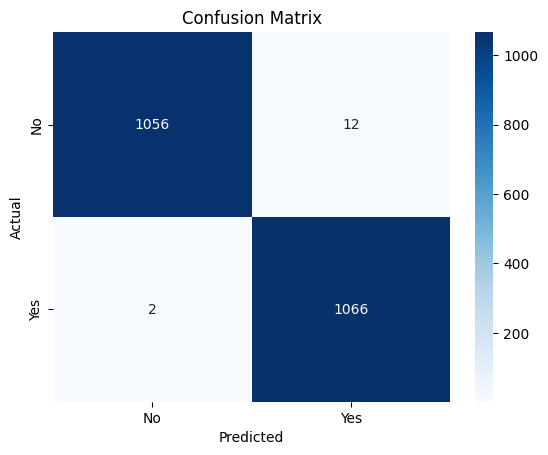

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Prepare the data
X = df_balanced.drop("Attrition", axis=1)
y = df_balanced["Attrition"]

#  Map string labels to numeric labels
# label_map = {"No": 0, "Yes": 1}
# y = y.map(label_map)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Instantiate an SVM classifier
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X, y)

# Get the best parameters and best estimator from the search
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Perform cross-validation
scores = cross_val_score(svm, X, y, cv=10)


# Make predictions on the test set using the best estimator
y_pred = best_svm.predict(X)


# Calculate F1-score
svm_cv_f1 = f1_score(y, y_pred)

# Calculate confusion matrix
svm_cv_cm = confusion_matrix(y, y_pred)

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
svm_cv_mean_accuracy = np.mean(scores)
print("Mean accuracy:", svm_cv_mean_accuracy)
print("F1-Score:", svm_cv_f1)
print("Confusion Matrix:")
print(svm_cv_cm)


# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(svm_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np

# Calculate confusion matrix
svm_cv_cm = confusion_matrix(y, y_pred)

# Create the label row
label_row = " & ".join([""] + ["\\text{" + label + "}" for label in labels])

# Create LaTeX code for the confusion matrix
matrix_latex = "\\text{Matriz de Confusão - SVM - Cross-Validation}\n"
matrix_latex += "\\begin{bmatrix}\n"
matrix_latex += label_row + " \\\\\n"
matrix_latex += "\\\\\n".join(["\\text{" + labels[i] + "} & " + " & ".join(map(str, row)) for i, row in enumerate(svm_cv_cm)])
matrix_latex += "\n\\end{bmatrix}"

# Print the LaTeX code for the confusion matrix
print(matrix_latex)


\text{Matriz de Confusão - SVM - Cross-Validation}
\begin{bmatrix}
 & \text{No} & \text{Yes} \\
\text{No} & 1233 & 0\\
\text{Yes} & 237 & 0
\end{bmatrix}


#### Formatando Métricas para Latex

In [ ]:
from tabulate import tabulate

metrics_svm = [svm_holdout_accuracy, svm_holdout_f1, svm_cv_mean_accuracy, svm_cv_f1]

# Data for the table
data = [
    ["Holdout (Treinamento=70% e Teste=30%)", svm_holdout_accuracy, svm_holdout_f1],
    ["Cross-Validation k=10", svm_cv_mean_accuracy, svm_cv_f1]
]

# Table headers
headers = ["Evaluation Method", "Accuracy", "F1-Score"]

# Generate LaTeX table
latex_table = tabulate(data, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lrr}
\hline
 Evaluation Method                     &   Accuracy &   F1-Score \\
\hline
 Holdout (Treinamento=70\% e Teste=30\%) &   0.864275 &   0.849741 \\
 Cross-Validation k=10                 &   0.72707  &   0.993476 \\
\hline
\end{tabular}


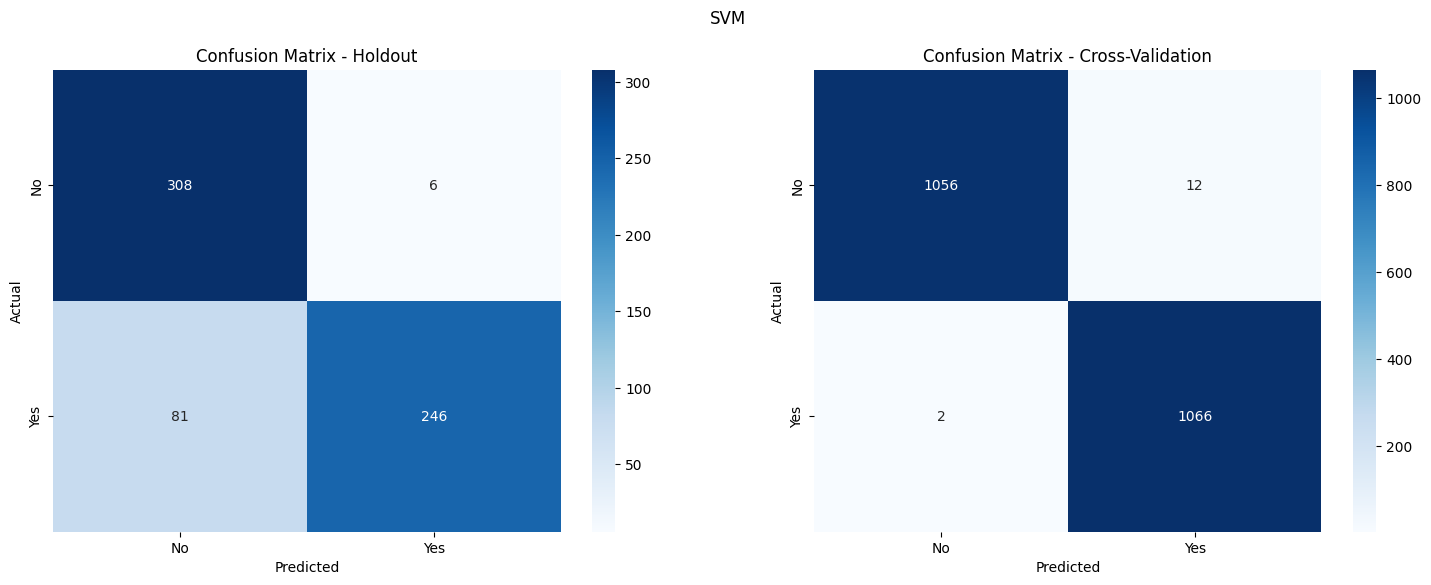

In [ ]:
# Plot the confusion matrix for Holdout
plt.subplot(121)
sns.heatmap(svm_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Holdout")
plt.suptitle("SVM")
plt.subplots_adjust(wspace=0.2)

# Plot the confusion matrix for Cross-Validation
plt.subplot(122)
sns.heatmap(svm_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cross-Validation")

# Increase the width of the figure
fig = plt.gcf()
fig.set_size_inches(18, 6)  # Adjust the width and height as needed


plt.show()

## 6.4 Rede Neural MLP

#### Holdout (Treinamento 70% e Teste 30%)

Accuracy: 0.8096723868954758
F1-score: 0.8221574344023324
Confusion matrix:
 [[237  77]
 [ 45 282]]


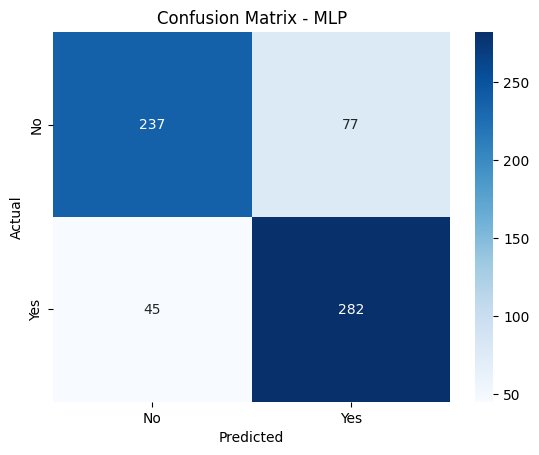

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Separate the features (X) and the target variable (y)
X = df_balanced.drop('Attrition', axis=1)
y = df_balanced['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100)}
mlp = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1500, activation='relu', alpha=0.01)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

# Calculate accuracy and F1-score
mlp_holdout_accuracy = accuracy_score(y_test, y_pred)
mlp_holdout_f1 = f1_score(y_test, y_pred)

# Generate the confusion matrix
mlp_holdout_cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", mlp_holdout_accuracy)
print("F1-score:", mlp_holdout_f1)
print("Confusion matrix:\n", mlp_holdout_cm)


# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(mlp_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP")
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'hidden_layer_sizes': [(100,), (200,), (100, 100), (200, 100), (200, 100, 50)], 
#     'activation': ['relu', 'logistic', 'identity','tanh'],  
#     'alpha': [0.001, 0.01], 
# }

# mlp = MLPClassifier(max_iter=1000, random_state=42)

# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(X_train, y_train)


# # Perform grid search on the training data
# grid_search.fit(X_train, y_train)

# # Get the best estimator from grid search
# best_estimator = grid_search.best_estimator_

# # Use the best estimator to make predictions on the test data
# y_pred = best_estimator.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)


# best_params = grid_search.best_params_
# print(best_params)
# # Print the best hyperparameters and accuracy
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 100)}
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 100)}
Accuracy: 0.7987519500780031


#### Cross-Validation (k=10)

Accuracy: 0.7041112719933308
F1-score: 0.7210944395410415
Confusion matrix:
 [[687 381]
 [251 817]]


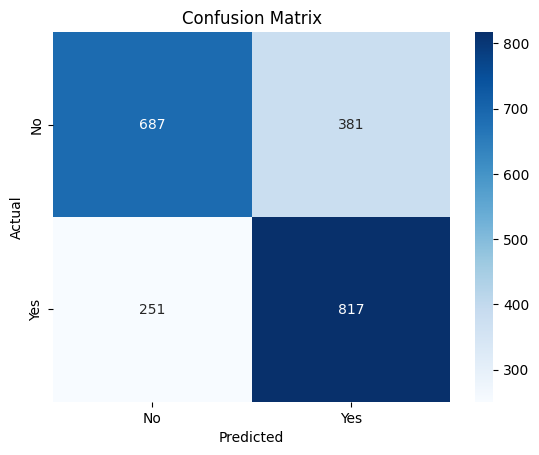

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate the features (X) and the target variable (y)
X = df_balanced.drop('Attrition', axis=1)
y = df_balanced['Attrition']

# Map string labels to numeric labels
# label_map = {"No": 0, "Yes": 1}
# y = y.map(label_map)

# # Perform label encoding for categorical variables
# label_encoder = LabelEncoder()
# X['Department'] = label_encoder.fit_transform(X['Department'])
# X['EducationField'] = label_encoder.fit_transform(X['EducationField'])
# X['MaritalStatus'] = label_encoder.fit_transform(X['MaritalStatus'])

# # Perform feature scaling on numerical variables
# scaler = StandardScaler()
# X[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']] = scaler.fit_transform(X[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']])

# Create an instance of the MLP classifier

mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42, activation='logistic', alpha=0.0001)

# Perform cross-validation
scores = cross_val_score(mlp, X, y, cv=10)

# Perform cross-validated predictions
y_pred = cross_val_predict(mlp, X, y, cv=10)


mlp_cv_mean_accuracy = np.mean(scores)

# Calculate F1-score
mlp_cv_f1 = f1_score(y, y_pred)

# Calculate confusion matrix
mlp_cv_cm = confusion_matrix(y, y_pred)


print("Accuracy:", mlp_cv_mean_accuracy)
print("F1-score:", mlp_cv_f1)
print("Confusion matrix:\n", mlp_cv_cm)



# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(mlp_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Formatando Métricas para Latex

In [ ]:
from tabulate import tabulate

metrics_mlp = [mlp_holdout_accuracy, mlp_holdout_f1, mlp_cv_mean_accuracy, mlp_cv_f1]

# Data for the table
data = [
    ["Holdout (Treinamento=70% e Teste=30%)", mlp_holdout_accuracy, mlp_holdout_f1],
    ["Cross-Validation k=10", mlp_cv_mean_accuracy, mlp_cv_f1]
]

# Table headers
headers = ["Evaluation Method", "Accuracy", "F1-Score"]

# Generate LaTeX table
latex_table = tabulate(data, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lrr}
\hline
 Evaluation Method                     &   Accuracy &   F1-Score \\
\hline
 Holdout (Treinamento=70\% e Teste=30\%) &   0.809672 &   0.822157 \\
 Cross-Validation k=10                 &   0.704111 &   0.721094 \\
\hline
\end{tabular}


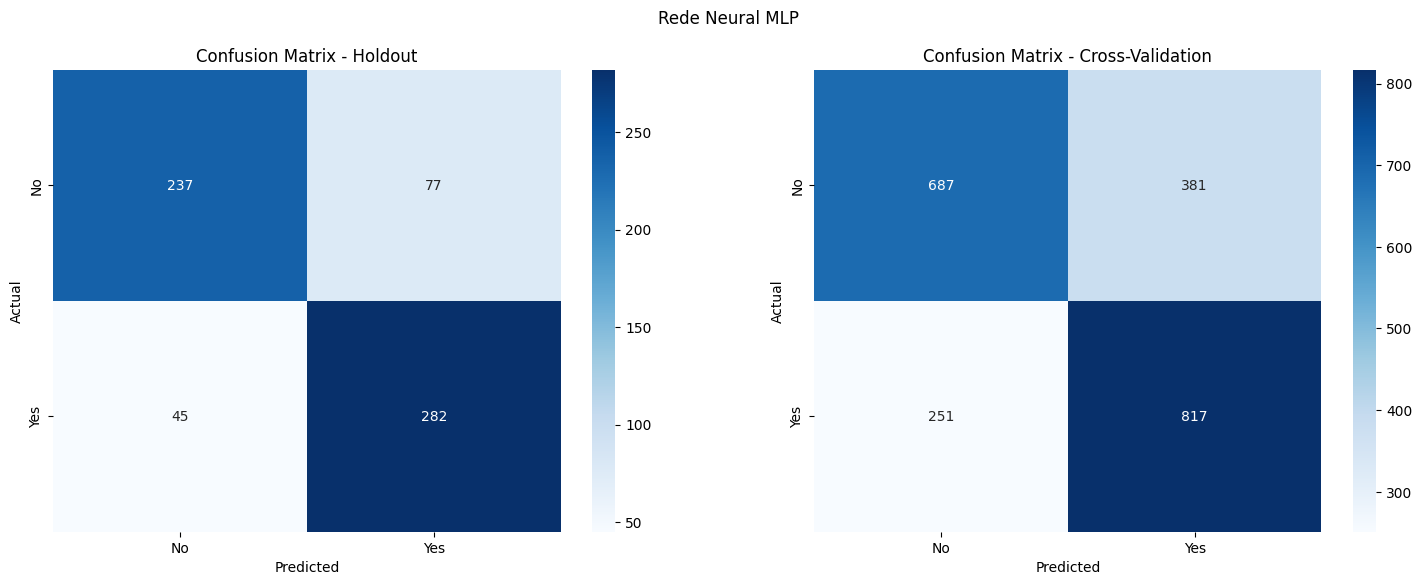

In [ ]:
# Plot the confusion matrix for Holdout
plt.subplot(121)
sns.heatmap(mlp_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Holdout")
plt.suptitle("Rede Neural MLP")
plt.subplots_adjust(wspace=0.2)

# Plot the confusion matrix for Cross-Validation
plt.subplot(122)
sns.heatmap(mlp_cv_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cross-Validation")

# Increase the width of the figure
fig = plt.gcf()
fig.set_size_inches(18, 6)  # Adjust the width and height as needed


plt.show()

## 6.5 Gradient Boosting Classifier

#### Holdout (Treinamento 70% e Teste 30%)

Accuracy: 0.8783151326053042
F1-score: 0.7210944395410415
Confusion matrix:
 [[687 381]
 [251 817]]


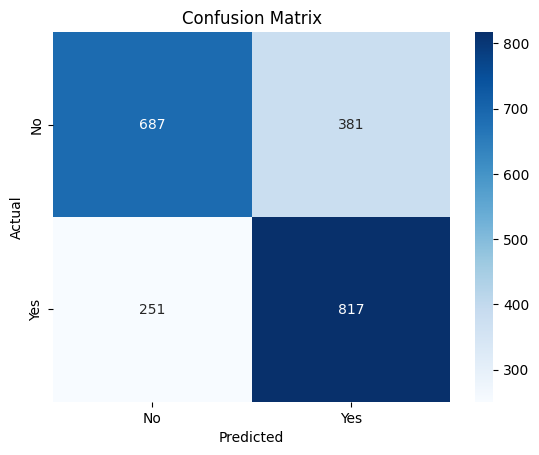

In [ ]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_balanced.drop('Attrition', axis=1)
y = df_balanced['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the initial Gradient Boosting Classifier
GB_model = GradientBoostingClassifier().fit(X_train, y_train)

# Define the hyperparameter search space
param_dist = {
    "n_estimators": [5, 20, 100, 500],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 1, 10, 100]
}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform randomized search cross-validation
RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

# Find the best estimator
GB = RCV.fit(X_train, y_train).best_estimator_

# Make predictions on the test set
pred = GB.predict(X_test)
pred_prob = GB.predict_proba(X_test)

# Calculate and print the accuracy
gbc_holdout_accuracy = accuracy_score(y_test, pred)

# Calculate F1-score
gbc_holdout_f1 = f1_score(y, y_pred)

# Calculate confusion matrix
gbc_holdout_cm = confusion_matrix(y, y_pred)


print("Accuracy:", gbc_holdout_accuracy)
print("F1-score:", gbc_holdout_f1)
print("Confusion matrix:\n", gbc_holdout_cm)



# Plot the confusion matrix
labels = ["No", "Yes"]
sns.heatmap(gbc_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Cross-Validation (k=10)

Average ROC AUC: 0.9609128478442269
Average Accuracy: 0.9082397003745318
Average F1-score: 0.9058597502401537


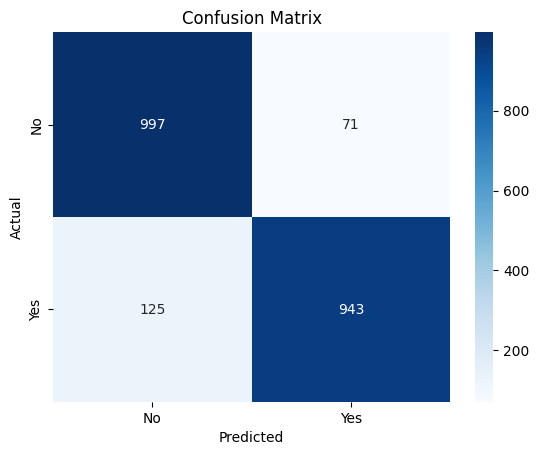

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, StratifiedKFold, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Separate the features (X) and the target variable (y)
X = df_balanced.drop('Attrition', axis=1)
y = df_balanced['Attrition']

# Train the initial Gradient Boosting Classifier
GB_model = GradientBoostingClassifier()

# Define the hyperparameter search space
param_dist = {
    "n_estimators": [5, 20, 100, 500],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 1, 10, 100]
}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform randomized search cross-validation
RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)

# Find the best estimator
GB = RCV.fit(X, y).best_estimator_

# Perform cross-validation
cv_results = cross_val_score(GB, X, y, cv=cv, scoring='roc_auc')

# Calculate and print the average cross-validation score
print("Average ROC AUC:", np.mean(cv_results))

# Make predictions using cross-validation
y_pred = cross_val_predict(GB, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1))

# Calculate and print the average accuracy and F1-score
gbc_cv_mean_accuracy = accuracy_score(y, y_pred)
gbc_cv_f1 = f1_score(y, y_pred)
print("Average Accuracy:", gbc_cv_mean_accuracy)
print("Average F1-score:", gbc_cv_f1)

# Calculate and plot the confusion matrix
gbc_cm = confusion_matrix(y, y_pred)
labels = ["No", "Yes"]
sns.heatmap(gbc_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



#### Formatando Métricas para Latex

In [ ]:
from tabulate import tabulate

metrics_gbc = [gbc_holdout_accuracy, gbc_holdout_f1, gbc_cv_mean_accuracy, gbc_cv_f1]

# Data for the table
data = [
    ["Holdout (Treinamento=70% e Teste=30%)", gbc_holdout_accuracy, gbc_holdout_f1],
    ["Cross-Validation k=10", gbc_cv_mean_accuracy, gbc_cv_f1]
]

# Table headers
headers = ["Evaluation Method", "Accuracy", "F1-Score"]

# Generate LaTeX table
latex_table = tabulate(data, headers, tablefmt="latex")

# Print the LaTeX table
print(latex_table)


\begin{tabular}{lrr}
\hline
 Evaluation Method                     &   Accuracy &   F1-Score \\
\hline
 Holdout (Treinamento=70\% e Teste=30\%) &   0.878315 &   0.721094 \\
 Cross-Validation k=10                 &   0.90824  &   0.90586  \\
\hline
\end{tabular}


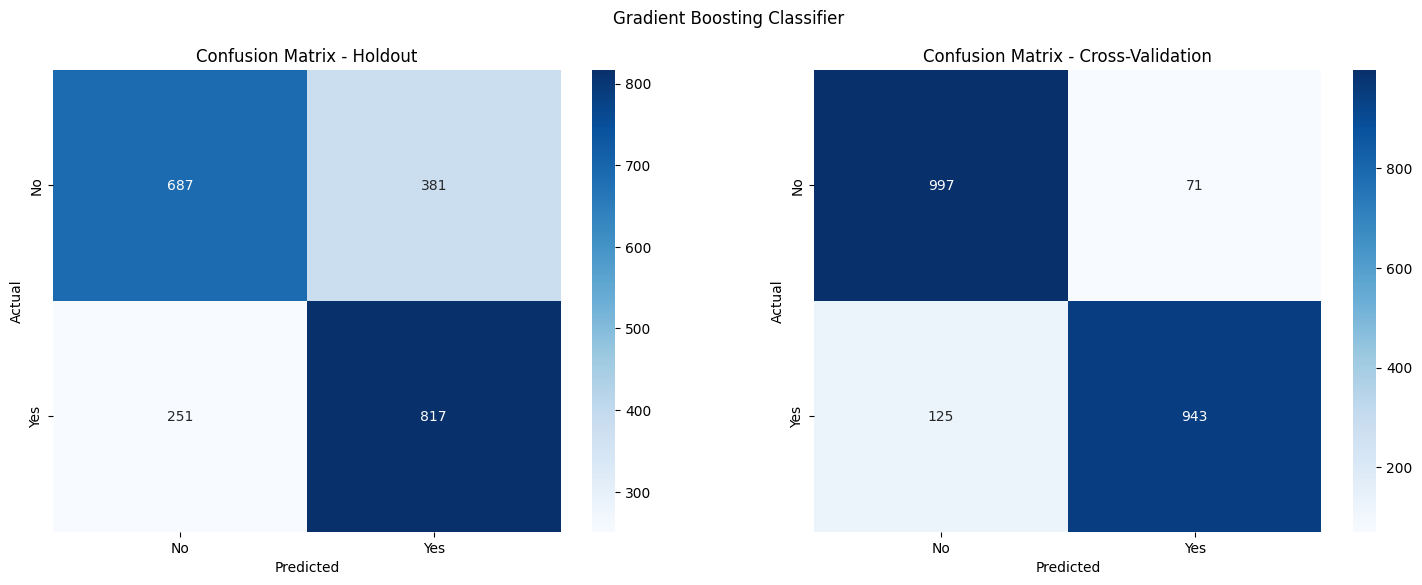

In [ ]:
# Plot the confusion matrix for Holdout
plt.subplot(121)
sns.heatmap(gbc_holdout_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Holdout")
plt.suptitle("Gradient Boosting Classifier")
plt.subplots_adjust(wspace=0.2)

# Plot the confusion matrix for Cross-Validation
plt.subplot(122)
sns.heatmap(gbc_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cross-Validation")

# Increase the width of the figure
fig = plt.gcf()
fig.set_size_inches(18, 6)  # Adjust the width and height as needed


plt.show()

## 6.6 Comparação Métodos de Classificação

In [ ]:
import pandas as pd
from tabulate import tabulate

# Define os resultados de cada algoritmo
results = {
    'Algorithm': ['Decision Tree', 'KNN', 'SVM', 'Neural Network MLP', 'Gradient Boosting Classifier'],
    'Holdout Accuracy': [metrics_dt[0], metrics_knn[0], metrics_svm[0], metrics_mlp[0], metrics_gbc[0]],
    'Holdout F1-Score': [metrics_dt[1], metrics_knn[1], metrics_svm[1], metrics_mlp[1], metrics_gbc[1]],
    'Cross Validation Accuracy': [metrics_dt[2], metrics_knn[2], metrics_svm[2], metrics_mlp[2], metrics_gbc[2]],
    'Cross Validation F1-Score': [metrics_dt[3], metrics_knn[3], metrics_svm[3], metrics_mlp[3], metrics_gbc[3]]
}

# Cria um DataFrame do pandas
df = pd.DataFrame(results)

# Define o índice como a coluna "Algorithm"
df.set_index('Algorithm', inplace=True)

# Arredonda todos os valores para 3 casas decimais
df = df.round(3)

# Seleciona apenas as colunas de "Holdout"
df_holdout = df[['Holdout Accuracy', 'Holdout F1-Score']]

# Converte a tabela de "Holdout" para formato tabular
table_holdout = tabulate(df_holdout, headers='keys', tablefmt='psql')

# Exibe a tabela de "Holdout"
print("Tabela Holdout:")
print(table_holdout)
print()


# Converte os resultados e cabeçalhos para formato LaTeX
table_latex = tabulate(df_holdout, headers='keys', tablefmt='latex')

# Exibe a tabela LaTeX
print(table_latex)

# Seleciona apenas as colunas de "Cross Validation"
df_cross_val = df[['Cross Validation Accuracy', 'Cross Validation F1-Score']]

# Converte a tabela de "Cross Validation" para formato tabular
table_cross_val = tabulate(df_cross_val, headers='keys', tablefmt='psql')

# Exibe a tabela de "Cross Validation"
print("Tabela Cross Validation:")
print(table_cross_val)

# Converte os resultados e cabeçalhos para formato LaTeX
table_latex = tabulate(df_cross_val, headers='keys', tablefmt='latex')

# Exibe a tabela LaTeX
print(table_latex)


Tabela Holdout:
+------------------------------+--------------------+--------------------+
| Algorithm                    |   Holdout Accuracy |   Holdout F1-Score |
|------------------------------+--------------------+--------------------|
| Decision Tree                |              0.75  |              0.765 |
| KNN                          |              0.789 |              0.814 |
| SVM                          |              0.864 |              0.85  |
| Neural Network MLP           |              0.81  |              0.822 |
| Gradient Boosting Classifier |              0.878 |              0.721 |
+------------------------------+--------------------+--------------------+

\begin{tabular}{lrr}
\hline
 Algorithm                    &   Holdout Accuracy &   Holdout F1-Score \\
\hline
 Decision Tree                &              0.75  &              0.765 \\
 KNN                          &              0.789 &              0.814 \\
 SVM                          &              0.8

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Define os resultados de cada algoritmo
results = {
    'Algorithm': ['Decision Tree', 'KNN', 'SVM', 'Neural Network MLP', 'Gradient Boosting Classifier'],
    'Holdout Accuracy': [metrics_dt[0], metrics_knn[0], metrics_svm[0], metrics_mlp[0], metrics_gbc[0]],
    'Holdout F1-Score': [metrics_dt[1], metrics_knn[1], metrics_svm[1], metrics_mlp[1], metrics_gbc[1]],
    'Cross Validation Accuracy': [metrics_dt[2], metrics_knn[2], metrics_svm[2], metrics_mlp[2], metrics_gbc[2]],
    'Cross Validation F1-Score': [metrics_dt[3], metrics_knn[3], metrics_svm[3], metrics_mlp[3], metrics_gbc[3]]
}

# Cria um DataFrame do pandas
df = pd.DataFrame(results)

# Arredonda todos os valores para 3 casas decimais
df = df.round(3)

# Cria a tabela do Plotly
table = go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df[c] for c in df.columns],
               fill_color='lavender',
               align='left'))

# Define o layout do gráfico
layout = go.Layout(width=800, height=400)

# Cria a figura do Plotly
fig = go.Figure(data=[table], layout=layout)

# Exibe a tabela
fig.show()
